# Packages import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model   import LinearRegression
from sklearn.svm            import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics        import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings
from statsmodels.tsa.stattools import adfuller, kpss
warnings.filterwarnings('ignore')

# Data Understanding

In [2]:
df=pd.read_excel("Sales_data.xlsx")

In [3]:
df.head(10)

CodeProduit                   Pays             Date
0         lot            royaume-uni  06 Octobre 2014
1        smlt            royaume-uni  06 Octobre 2014
2       dsmlt  états-unis d'amérique  06 Octobre 2014
3          2x            royaume-uni  06 Octobre 2014
4       rouge  états-unis d'amérique  06 Octobre 2014
5          2x                 italie  06 Octobre 2014
6     2 trans                 france  06 Octobre 2014
7         lot                 france  06 Octobre 2014
8          1x                 france  06 Octobre 2014
9       dsmlt                 france  06 Octobre 2014

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10433 entries, 0 to 10432
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CodeProduit  10433 non-null  object
 1   Pays         8068 non-null   object
 2   Date         10433 non-null  object
dtypes: object(3)
memory usage: 244.7+ KB


In [5]:
# Cette Data Frame représente 6880 lignes et 4 colonnes sans valeurs manquantes
df["Pays"].unique()

array(['royaume-uni', "états-unis d'amérique", 'italie', 'france',
       'irlande', 'pays-bas', 'grèce', 'canada', 'australie', 'allemagne',
       nan, 'brooklyn', 'espagne', 'belgique', 'chypre', 'danemark',
       'hong kong', 'malte', 'united kingdom', 'chili', 'autriche',
       'norvège', 'deutschland', 'emirats arabes unis', 'malaysia',
       'croatie', 'suède', 'république tchèque', 'hongrie', 'usa',
       'qatar', 'greece', 'koweït', 'luxembourg', 'nouvelle-zélande',
       'finland', 'nouvelle-calédonie', 'malaisie', 'slovénie',
       'south africa', 'cyprus', 'saudi arabia', 'turquie', 'nederlanad',
       'arabie saoudite', 'suisse', 'liban', 'pologne', 'lituanie',
       'united states', 'bulgarie', 'corée du sud', 'singapour',
       'roumanie', 'portugal', 'estonie', 'oman', 'finlande', 'denmark',
       'latvia', 'germany', 'malta', 'spain', 'belgium', 'sweden',
       'italy', 'hungary', 'brunei', 'russia', 'norway', 'switzerland',
       'croatia', 'czech republic

In [6]:
df["Date"].unique()

array(['06 Octobre 2014', '10 Novembre 2014', '12 Octobre 2014', ...,
       '21 September 2023', '25 September 2023', '29 September 2023'],
      dtype=object)

# Data cleaning

In [7]:
# Dictionnaire de correspondance des noms de mois avec leurs numéros
falseCountries_to_correct = {
    'usa': "états-unis d'amérique",'brooklyn':"états-unis d'amérique", "etats-unis":"états-unis d'amérique", 'deutschland': 'allemagne','malta': 'malte','france métropolitaine':'france', 'malaysia': 'malaisie','south africa': 'afrique de sud', 'nederlanad': 'pays-bas', 'united states': "états-unis d'amérique", 'germany': 'allemagne','spain':'espagne','belgium':'belgique',
    'sweden': 'suède', 'italy': 'italie', 'hungary': 'hongrie','norway': 'norvège','Croatia': 'croatie','new zealand': 'nouvelle-zélande','nederland':'pays-bas','saudi arabia':'arabie saoudite', 'switzerland': 'suisse','denmark':'danemark', 'czech republic': 'république tchèque',
    'poland':'pologne', "greece":"grèce","mexico":"mexique","irlande (eire)":"irlande","japan":"japon","thailand":"thailande","russia":"russie"
}
# Fonction pour remplacer les noms de pays par leurs noms correspondants
def replace_country(c_str):
    for c, cc in falseCountries_to_correct.items():
        if not pd.isna(c_str) and c in c_str:
            return c_str.replace(c, cc)
    return c_str  # Retourne la chaîne inchangée si aucun remplacement n'est effectué

# Application de la fonction sur la colonne "Date"
df['Pays'] = df['Pays'].apply(replace_country)

In [8]:
df["Pays"].unique()

array(['royaume-uni', "états-unis d'amérique", 'italie', 'france',
       'irlande', 'pays-bas', 'grèce', 'canada', 'australie', 'allemagne',
       nan, 'espagne', 'belgique', 'chypre', 'danemark', 'hong kong',
       'malte', 'united kingdom', 'chili', 'autriche', 'norvège',
       'emirats arabes unis', 'malaisie', 'croatie', 'suède',
       'république tchèque', 'hongrie', 'qatar', 'koweït', 'luxembourg',
       'nouvelle-zélande', 'finland', 'nouvelle-calédonie', 'slovénie',
       'afrique de sud', 'cyprus', 'arabie saoudite', 'turquie', 'suisse',
       'liban', 'pologne', 'lituanie', 'bulgarie', 'corée du sud',
       'singapour', 'roumanie', 'portugal', 'estonie', 'oman', 'finlande',
       'latvia', 'brunei', 'russie', 'croatia', 'argentine', 'slovaquie',
       'japon', 'south korea', 'kuwait', 'thailande', 'mexique'],
      dtype=object)

In [9]:
# Dictionnaire de correspondance des noms de mois avec leurs numéros
month_to_num = {
    'Janvier': '01', 'janvier': '01', 'JANV':'01', 'Février': '02','Vévrier': '02','FEV':'02', 'Mars': '03', 'MARS':'03', 'mars': '03', 'Avril': '04', 'Mai': '05', 'MAI':'05', 'MA':'05', 'Juin': '06','June':'06','JUIN':'06','JUN':'06', 'Jun':'06',
    'Juillet': '07', 'Jullet': '07', 'Juill': '07', 'Aout': '08','Août':'08', 'Septembre': '09', 'September': '09','Sept': '09','sept': '09','Saptembre':'09','Spt':'09', 'Octobre': '10','OCT':'10', 'Novembre': '11',
    'Novembe':'11','NOV':'11', 'Décembre': '12','December':'12','DECEMBRE':'12', 'DEC':'12'
}
# Fonction pour remplacer les noms de mois par leurs numéros correspondants
def replace_month(date_str):
    for month, num in month_to_num.items():
        if month in date_str:
            return date_str.replace(month, num)
    return date_str  # Retourne la chaîne inchangée si aucun remplacement n'est effectué

# Application de la fonction sur la colonne "Date"
df['Date'] = df['Date'].apply(replace_month)


Nous avons remplacé chaque mois par son rang

Nous avons fait des modification sur la colonne date pour atteindre la format suivante : dd-mm-yyyy

In [10]:
# Fonction pour reformater la date
def reformat_date(date_str):
    date_str = re.sub(r'\s{2,}', ' ', date_str).strip()
    return date_str.strip().replace(' ', '-')

# Application de la fonction sur la colonne "Date"
df['Date'] = df['Date'].apply(reformat_date)

# Affichage du DataFrame avec les dates reformatées
df.head()

CodeProduit                   Pays        Date
0         lot            royaume-uni  06-10-2014
1        smlt            royaume-uni  06-10-2014
2       dsmlt  états-unis d'amérique  06-10-2014
3          2x            royaume-uni  06-10-2014
4       rouge  états-unis d'amérique  06-10-2014

In [11]:
# Vérifier les valeurs qui ne correspondent pas au format 'dd-mm-yyyy'
invalid_dates = df[~df['Date'].str.match(r'\d{1,2}-\d{2}-\d{4}')]

# Afficher les valeurs invalides
print("Valeurs de la colonne 'Date' qui ne correspondent pas au format 'dd-mm-yyyy': ", invalid_dates.shape[0])

Valeurs de la colonne 'Date' qui ne correspondent pas au format 'dd-mm-yyyy':  0


In [12]:
# Conversion du type de la colonne 'Sales_number' en int64
#df['Sales_number'] = df['Sales_number'].astype('int64')

In [13]:
# Remplacer les valeurs 'États-Unis d'Amérique' par 'USA' dans la colonne 'Pays'
df['Pays'] = df['Pays'].replace('états-unis d\'amérique', 'USA')

Aprés le netoyage de nos données, notre base contient 6710 lignes et 4 colonnes: CodeProduit, Pays, Date et Sales_number.
Aussi on remarque qu'on n'a pas des valeurs nulles.

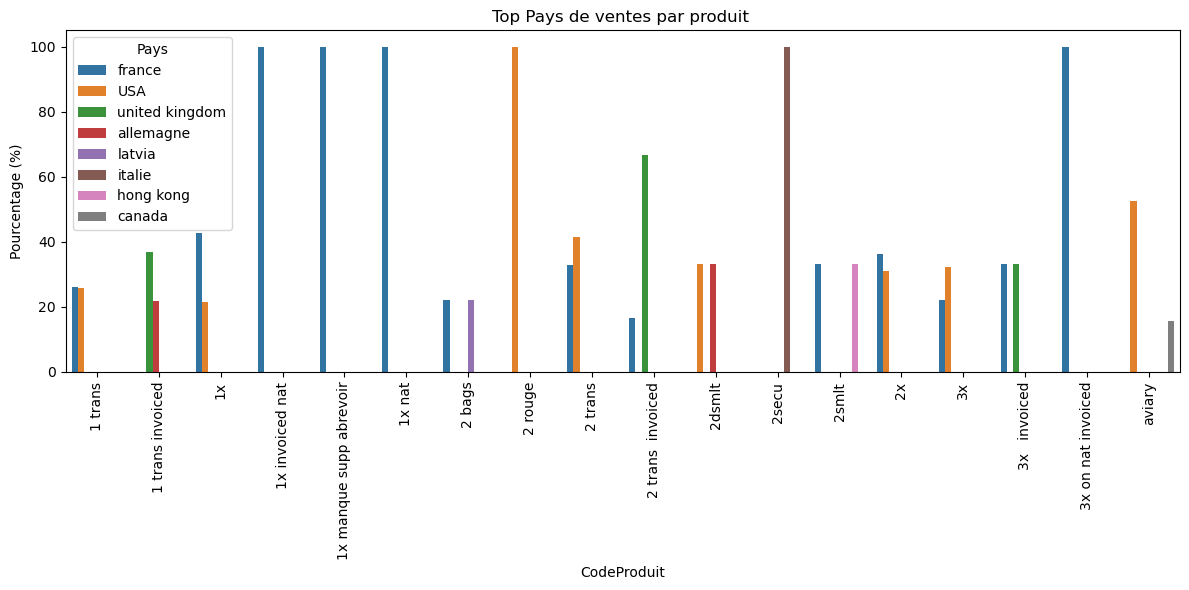

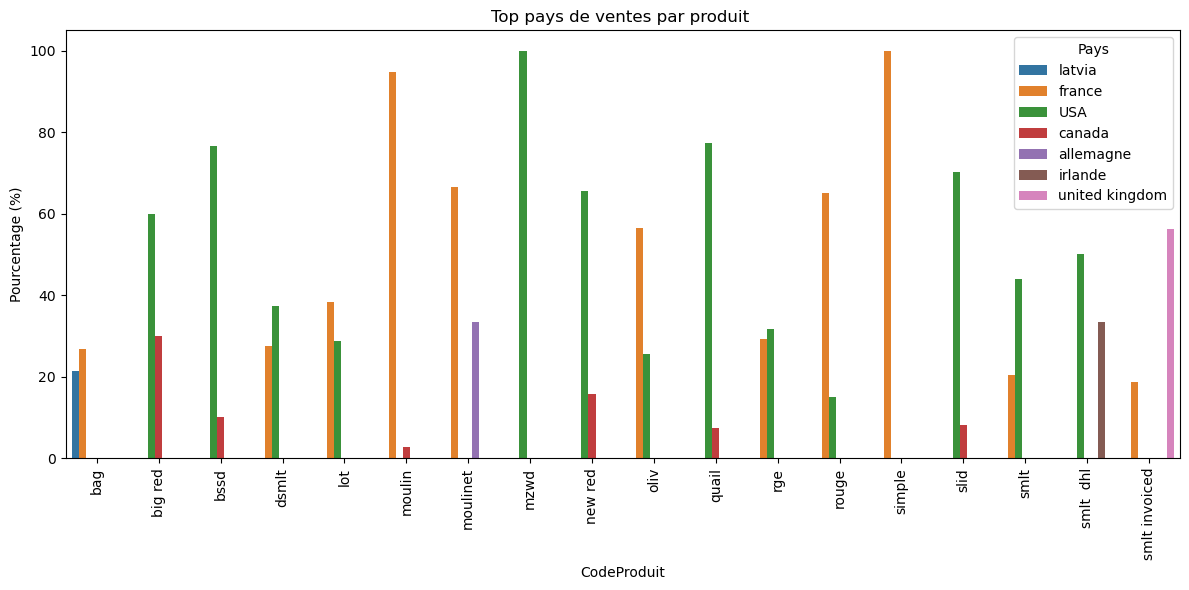

In [14]:
# Importer les bibliothèques
import matplotlib.pyplot as plt
import seaborn as sns
# Trier les données par CodeProduit
# Compter les occurrences pour chaque produit et pays
grouped = df.groupby(['CodeProduit', 'Pays']).size().reset_index(name='NombreVentes')

# Calculer les pourcentages
grouped['Pourcentage'] = grouped.groupby('CodeProduit')['NombreVentes'].transform(lambda x: x / x.sum() * 100)

# Trier et sélectionner les deux plus grands pourcentages
top2 = grouped.sort_values(['CodeProduit', 'Pourcentage'], ascending=[True, False]).groupby('CodeProduit').head(2)

top2_sorted = top2.sort_values(by='CodeProduit')
# Diviser en deux groupes
n = len(top2_sorted['CodeProduit'].unique()) // 2
group1 = top2_sorted[top2_sorted['CodeProduit'].isin(top2_sorted['CodeProduit'].unique()[:n])]
group2 = top2_sorted[top2_sorted['CodeProduit'].isin(top2_sorted['CodeProduit'].unique()[n:])]


# Créer un graphique pour le groupe 1
plt.figure(figsize=(12, 6))
sns.barplot(data=group1, x='CodeProduit', y='Pourcentage', hue='Pays')
plt.title("Top Pays de ventes par produit ")
plt.ylabel("Pourcentage (%)")
plt.xlabel("CodeProduit")
plt.xticks(rotation=90)
plt.legend(title="Pays")
plt.tight_layout()
plt.show()

# Créer un graphique pour le groupe 2
plt.figure(figsize=(12, 6))
sns.barplot(data=group2, x='CodeProduit', y='Pourcentage', hue='Pays')
plt.title("Top pays de ventes par produit ")
plt.ylabel("Pourcentage (%)")
plt.xlabel("CodeProduit")
plt.xticks(rotation=90)
plt.legend(title="Pays")
plt.tight_layout()
plt.show()



          CodeProduit  NombreNulls  PourcentageNulls  NombreVentes
0             1 trans           45          1.902748           685
1    1 trans invoiced            3          0.126850            49
2                  1x          351         14.841438          1206
3              1x nat            2          0.084567             4
4              2 bags            3          0.126850            12
5             2 rouge            2          0.084567             6
6             2 trans          196          8.287526           832
7   2 trans  invoiced            1          0.042283             7
8              2dsmlt            1          0.042283             4
9               2smlt            1          0.042283             4
10                 2x          258         10.909091          1093
11                 3x          811         34.291755          3256
12      3x   invoiced            4          0.169133            28
13             aviary           14          0.591966          

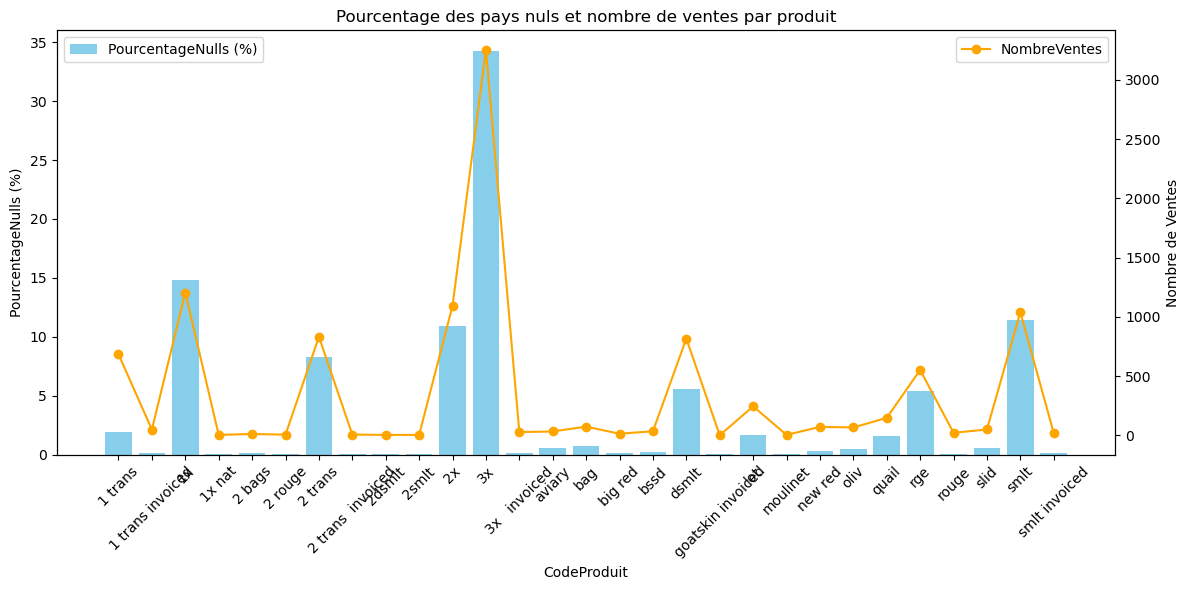

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df
# Calculer le total des ventes par produit
total_sales = df.groupby('CodeProduit').size().reset_index(name='NombreVentes')

# Filtrer les lignes où "Pays" est nul
nulls = df[df['Pays'].isnull()]

# Compter les nulls par produit
null_counts = nulls.groupby('CodeProduit').size().reset_index(name='NombreNulls')

# Calculer le total global des nulls
total_nulls = null_counts['NombreNulls'].sum()

# Calculer les pourcentages de nulls pour chaque produit
null_counts['PourcentageNulls'] = (null_counts['NombreNulls'] / total_nulls) * 100

# Fusionner avec le total des ventes
result = pd.merge(null_counts, total_sales, on='CodeProduit', how='left')

# Afficher le résultat final
print(result)



# Créer le graphique
fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe pour le pourcentage de nulls
ax1.bar(result['CodeProduit'], result['PourcentageNulls'], color='skyblue', label='PourcentageNulls (%)')
ax1.set_ylabel('PourcentageNulls (%)')
ax1.set_xlabel('CodeProduit')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Axe pour le nombre de ventes
ax2 = ax1.twinx()
ax2.plot(result['CodeProduit'], result['NombreVentes'], color='orange', marker='o', label='NombreVentes')
ax2.set_ylabel('Nombre de Ventes')
ax2.legend(loc='upper right')

plt.title('Pourcentage des pays nuls et nombre de ventes par produit')
plt.tight_layout()
plt.show()



In [16]:
# remplissage

# Define the mapping for 'CodeProduit' and their corresponding 'Pays' values
product_country_map = {
    '1 trans': 'france',
    '1 trans invoiced': 'united kingdom',
    '1x': 'france',
    '1x nat': 'france',
    '2 rouge': 'USA',
    '2 trans': 'USA',
    '2 trans  invoiced': 'united kingdom',
    '2x': 'france',
    '3x': 'USA',
    'aviary': 'USA',
    'bag': 'france',
    'big red': 'USA',
    'bssd': 'USA',
    'dsmlt': 'USA',
    'lot': 'france',
    'moulinet': 'france',
    'new red': 'USA',
    'oliv': 'france',
    'quail': 'USA',
    'rge': 'USA',
    'rouge': 'france',
    'slid': 'USA',
    'smlt': 'USA',
    'smlt invoiced': 'united kingdom'
}

# Update 'Pays' based on the mapping for non-null 'Pays'
for product, country in product_country_map.items():
    df.loc[(df['CodeProduit'] == product) & (df['Pays'].isnull()), 'Pays'] = country

# Drop the rows where 'CodeProduit' is '2 bags', '2dsmlt', or '3x invoiced', 
# and 'Pays' is null in a single step for efficiency
df = df[~((df['CodeProduit'] == '2 bags') & (df['Pays'].isnull()))]
df = df[~((df['CodeProduit'] == '2dsmlt') & (df['Pays'].isnull()))]
df = df[~((df['CodeProduit'] == '3x   invoiced') & (df['Pays'].isnull()))]
df = df[~((df['CodeProduit'] == 'goatskin invoiced') & (df['Pays'].isnull()))]
df = df[~((df['CodeProduit'] == '2smlt') & (df['Pays'].isnull()))]

"\ndf.loc[(df['CodeProduit'] == '1 trans') & (df['Pays'].isnull()), 'Pays'] = 'france'\ndf.loc[(df['CodeProduit'] == '1 trans invoiced') & (df['Pays'].isnull()), 'Pays'] = 'united kingdom'\ndf.loc[(df['CodeProduit'] == '1x') & (df['Pays'].isnull()), 'Pays'] = 'france'\ndf.loc[(df['CodeProduit'] == '1x nat') & (df['Pays'].isnull()), 'Pays'] = 'france'\ndf = df[~((df['CodeProduit'] == '2 bags') & (df['Pays'].isnull()))]\ndf.loc[(df['CodeProduit'] == '2 rouge') & (df['Pays'].isnull()), 'Pays'] = 'USA'\ndf.loc[(df['CodeProduit'] == '2 trans') & (df['Pays'].isnull()), 'Pays'] = 'USA'\ndf.loc[(df['CodeProduit'] == '2 trans  invoiced') & (df['Pays'].isnull()), 'Pays'] = 'united kingdom'\ndf = df[~((df['CodeProduit'] == '2dsmlt') & (df['Pays'].isnull()))]\ndf.loc[(df['CodeProduit'] == '2x') & (df['Pays'].isnull()), 'Pays'] = 'france'\ndf.loc[(df['CodeProduit'] == '3x') & (df['Pays'].isnull()), 'Pays'] = 'USA'\ndf = df[~((df['CodeProduit'] == '3x   invoiced') & (df['Pays'].isnull()))]\ndf.loc[(

In [17]:
# Vérification des résultats
codes_produits_nulls = df[df['Pays'].isnull()]['CodeProduit'].unique()

# Afficher les résultats
print(codes_produits_nulls)


[]


In [18]:
df['sales_number'] = df.groupby(['CodeProduit', 'Pays', 'Date'])['CodeProduit'].transform('count').astype(int)
df

CodeProduit            Pays        Date  sales_number
0             lot     royaume-uni  06-10-2014             1
1            smlt     royaume-uni  06-10-2014             2
2           dsmlt             USA  06-10-2014             1
3              2x     royaume-uni  06-10-2014             1
4           rouge             USA  06-10-2014             1
...           ...             ...         ...           ...
10428       dsmlt       allemagne  29-09-2023             1
10429          3x         espagne  29-09-2023             1
10430          2x          france  29-09-2023             2
10431          1x  united kingdom  29-09-2023             1
10432        smlt  united kingdom  29-09-2023             1

[10423 rows x 4 columns]

In [19]:
df=df.drop_duplicates()
df.duplicated().sum()

0

 At least 30–50 observations for simple models like VAR.

In [20]:
# Group by 'CodeProduit' and calculate total sales
total_sales = df.groupby('CodeProduit')['sales_number'].sum()

# Filter for products with total sales >= 30
valid_products = total_sales[total_sales >= 30].index

# Keep only rows with valid CodeProduit
df = df[df['CodeProduit'].isin(valid_products)]

# Display the result
print(df)

# GVerify total sales > 30 
total_sales = df.groupby('CodeProduit')['sales_number'].sum()

# Print the result
print(total_sales)


      CodeProduit            Pays        Date  sales_number
0             lot     royaume-uni  06-10-2014             1
1            smlt     royaume-uni  06-10-2014             2
2           dsmlt             USA  06-10-2014             1
3              2x     royaume-uni  06-10-2014             1
5              2x          italie  06-10-2014             1
...           ...             ...         ...           ...
10427          2x          france  29-09-2023             2
10428       dsmlt       allemagne  29-09-2023             1
10429          3x         espagne  29-09-2023             1
10431          1x  united kingdom  29-09-2023             1
10432        smlt  united kingdom  29-09-2023             1

[7147 rows x 4 columns]
CodeProduit
1 trans              685
1 trans invoiced      49
1x                  1206
2 trans              832
2x                  1093
3x                  3256
aviary                33
bag                   74
bssd                  35
dsmlt             

In [21]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7147 entries, 0 to 7146
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CodeProduit   7147 non-null   object
 1   Pays          7147 non-null   object
 2   Date          7147 non-null   object
 3   sales_number  7147 non-null   int32 
dtypes: int32(1), object(3)
memory usage: 195.6+ KB


In [22]:
df.to_excel('Cleaned_Sales_Data.xlsx', index=False)

# Data Visualisation

In [23]:
df['Pays'].unique()

array(['royaume-uni', 'USA', 'italie', 'france', 'irlande', 'pays-bas',
       'grèce', 'canada', 'australie', 'allemagne', 'espagne', 'belgique',
       'chypre', 'danemark', 'hong kong', 'malte', 'united kingdom',
       'chili', 'autriche', 'norvège', 'emirats arabes unis', 'croatie',
       'suède', 'république tchèque', 'hongrie', 'qatar', 'koweït',
       'luxembourg', 'nouvelle-zélande', 'finland', 'nouvelle-calédonie',
       'malaisie', 'slovénie', 'afrique de sud', 'cyprus',
       'arabie saoudite', 'turquie', 'suisse', 'liban', 'pologne',
       'lituanie', 'bulgarie', 'corée du sud', 'singapour', 'roumanie',
       'portugal', 'estonie', 'oman', 'finlande', 'latvia', 'brunei',
       'russie', 'croatia', 'argentine', 'slovaquie', 'japon',
       'south korea', 'kuwait', 'thailande', 'mexique'], dtype=object)

 ### Voici la visualisation des nombre de ventes en fonction des Pays.

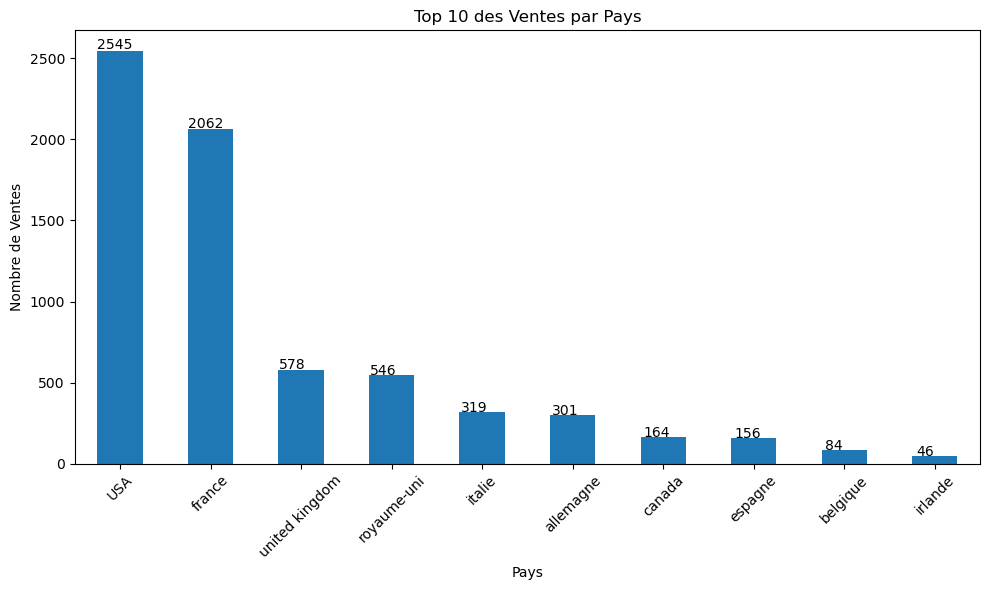

In [24]:
import matplotlib.pyplot as plt

# Grouper les données par pays et calculer le total des ventes par pays
sales_by_country = df.groupby('Pays').size().sort_values(ascending=False)

# Sélectionner les 10 premiers pays en fonction des ventes
top_10_countries = sales_by_country.head(10)

# Créer un graphique à barres pour visualiser les 10 premiers pays en fonction des ventes
plt.figure(figsize=(10, 6))
ax = top_10_countries.plot(kind='bar')
plt.title('Top 10 des Ventes par Pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de Ventes')
plt.xticks(rotation=45)

# Ajouter les valeurs sur chaque barre
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

plt.tight_layout()
plt.show()


##### On remarque que USA et France ont la plupart des nombre d'achats (3511 + 3478 parmis 12459) => 56%

### On a fait l'extraction des sommes des sales_number pour chaque mois pour visualiser le nombre de ventes en fonction des mois.

In [25]:
# Convertir la colonne 'Date' en format de date
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extraire le mois à partir de la colonne 'Date'
df['Month'] = df['Date'].dt.month

# Grouper les données par mois
sales_by_month = df.groupby('Month').size().reset_index(name='Sales')


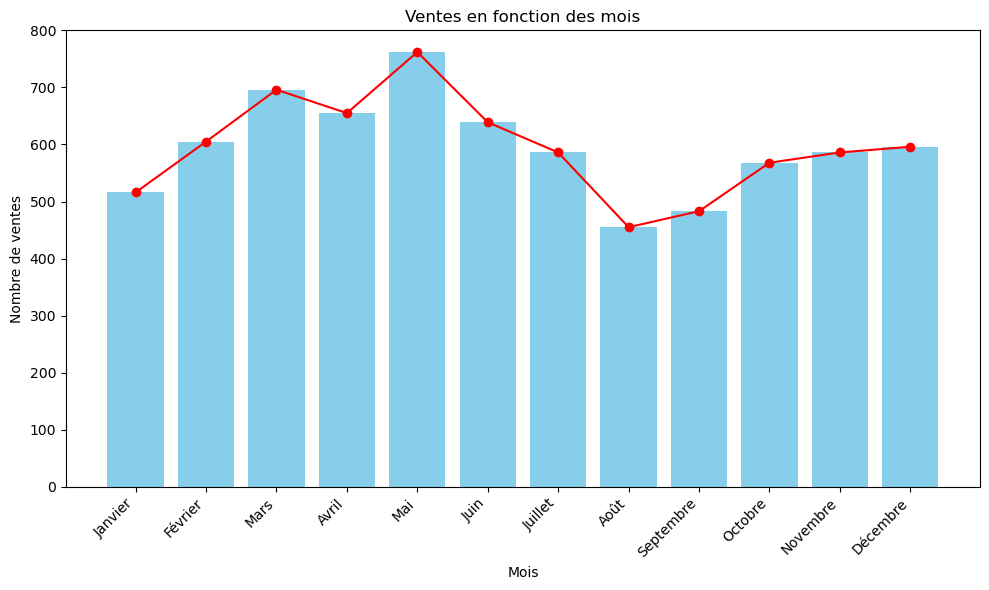

In [26]:
# Créer un dictionnaire pour mapper les nombres de mois aux noms des mois
month_names = {
    1: 'Janvier',
    2: 'Février',
    3: 'Mars',
    4: 'Avril',
    5: 'Mai',
    6: 'Juin',
    7: 'Juillet',
    8: 'Août',
    9: 'Septembre',
    10: 'Octobre',
    11: 'Novembre',
    12: 'Décembre'
}

# Appliquer le mapping des noms de mois à la colonne 'Month'
sales_by_month['Month'] = sales_by_month['Month'].map(month_names)
plt.figure(figsize=(10, 6))
plt.bar(sales_by_month["Month"], sales_by_month["Sales"], color='skyblue')
plt.plot(sales_by_month["Month"], sales_by_month["Sales"], color='red', marker='o', linestyle='-')

plt.title('Ventes en fonction des mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### => Nous pouvons constater une évolution des ventes dans les mois de mai et juin (1200) , mais on remarque aussi une chute dans les lois de janvier, aout et septembre.

# Machine Learning

In [27]:
df=df.drop("Month",axis=1)
df = df.set_index("Date")
df

CodeProduit            Pays  sales_number
Date                                                
2014-10-06         lot     royaume-uni             1
2014-10-06        smlt     royaume-uni             2
2014-10-06       dsmlt             USA             1
2014-10-06          2x     royaume-uni             1
2014-10-06          2x          italie             1
...                ...             ...           ...
2023-09-29          2x          france             2
2023-09-29       dsmlt       allemagne             1
2023-09-29          3x         espagne             1
2023-09-29          1x  united kingdom             1
2023-09-29        smlt  united kingdom             1

[7147 rows x 3 columns]

## Time Series EDA

In [28]:
from sktime.utils.plotting import plot_series

In [29]:
grouped = df.groupby('CodeProduit')

# Dictionary to hold smaller dataframes for each product
product_dataframes = {}

# Loop through each group and create a smaller dataframe for each product
for product, group in grouped:
    # Aggregating sales_number by Date and Pays
    product_grouped = group.groupby(['Date', 'Pays'])['sales_number'].sum().reset_index()

    # Pivot the data so that each country is a column
    product_pivoted = product_grouped.pivot(index='Date', columns='Pays', values='sales_number')

    # Fill missing values if necessary (e.g., forward-fill)
    product_pivoted = product_pivoted.resample('D').sum().fillna(0) 
    
    # Store the smaller dataframe in the dictionary
    product_dataframes[product] = product_pivoted

    # Print the smaller dataframe for this product
    print(f"Data for product {product}:")
    print(product_pivoted.head())
    

Data for product 1 trans:
Pays        USA  allemagne  australie  belgique  canada  espagne  france  \
Date                                                                       
2018-06-25  0.0        0.0        0.0       0.0     0.0      0.0    18.0   
2018-06-26  0.0        0.0        0.0       0.0     0.0      0.0     0.0   
2018-06-27  0.0        0.0        0.0       0.0     0.0      0.0     0.0   
2018-06-28  0.0        0.0        0.0       0.0     0.0      0.0     0.0   
2018-06-29  0.0        0.0        0.0       0.0     0.0      0.0     0.0   

Pays        grèce  irlande  italie  qatar  royaume-uni  suisse  suède  \
Date                                                                    
2018-06-25    0.0      0.0     0.0    0.0          0.0     0.0    0.0   
2018-06-26    0.0      0.0     0.0    0.0          0.0     0.0    0.0   
2018-06-27    0.0      0.0     0.0    0.0          0.0     0.0    0.0   
2018-06-28    0.0      0.0     0.0    0.0          0.0     0.0    0.0   
201

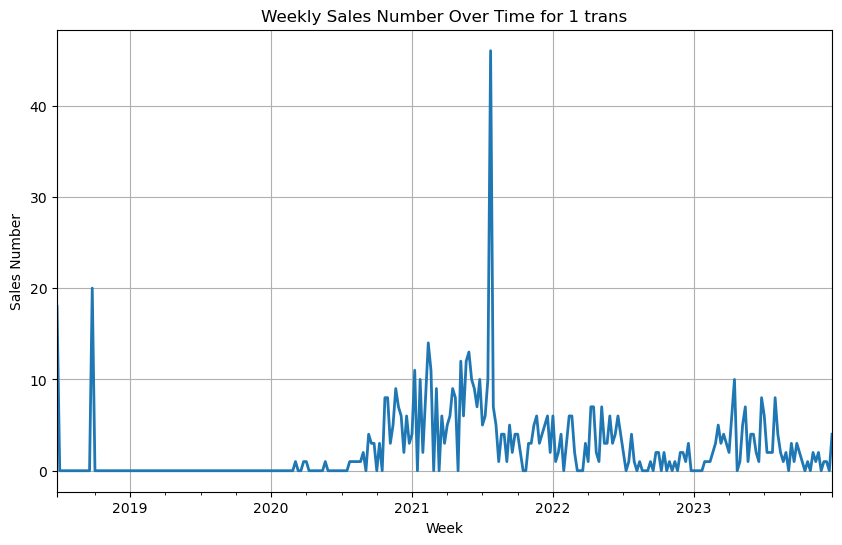

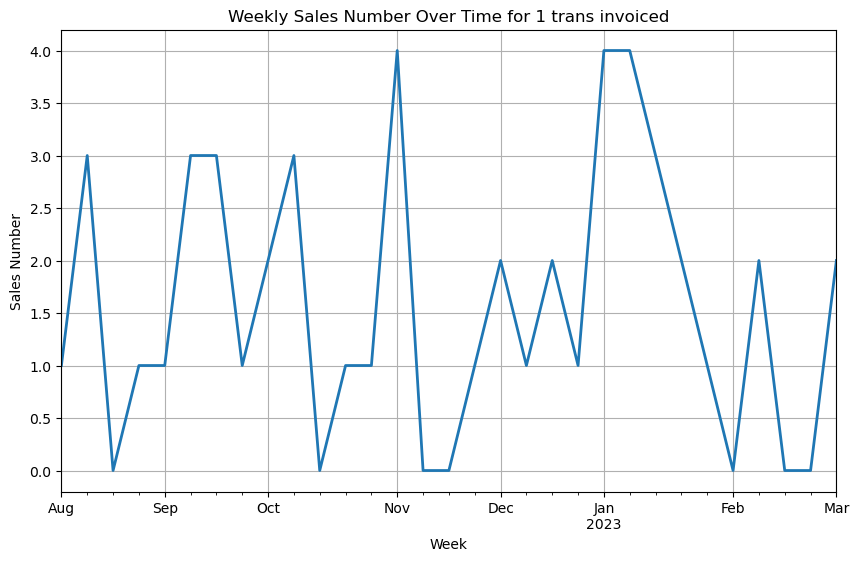

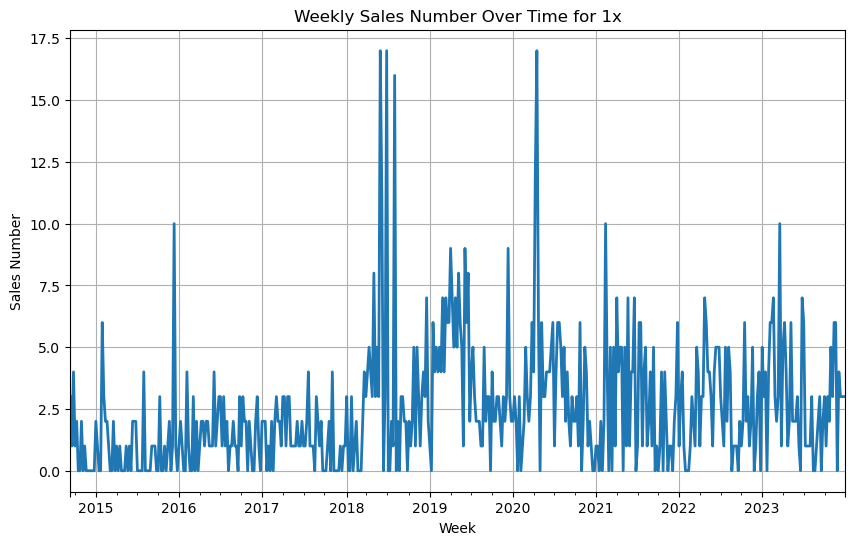

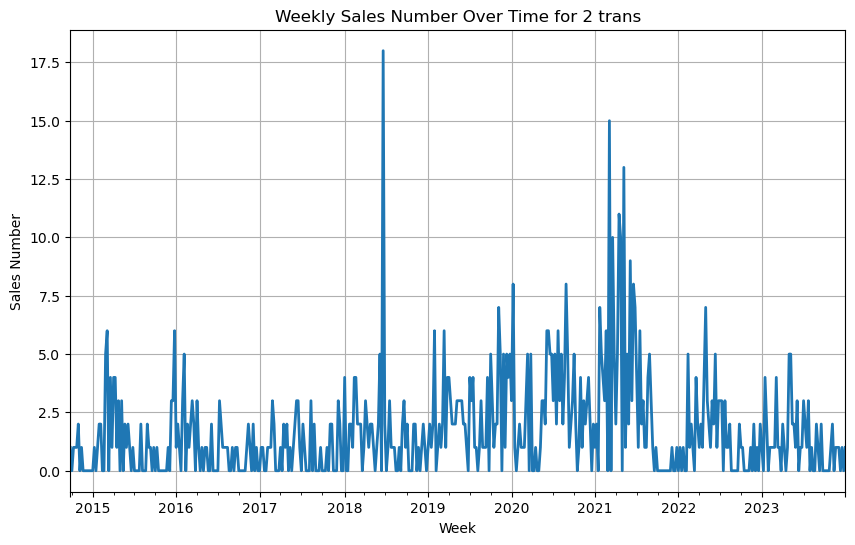

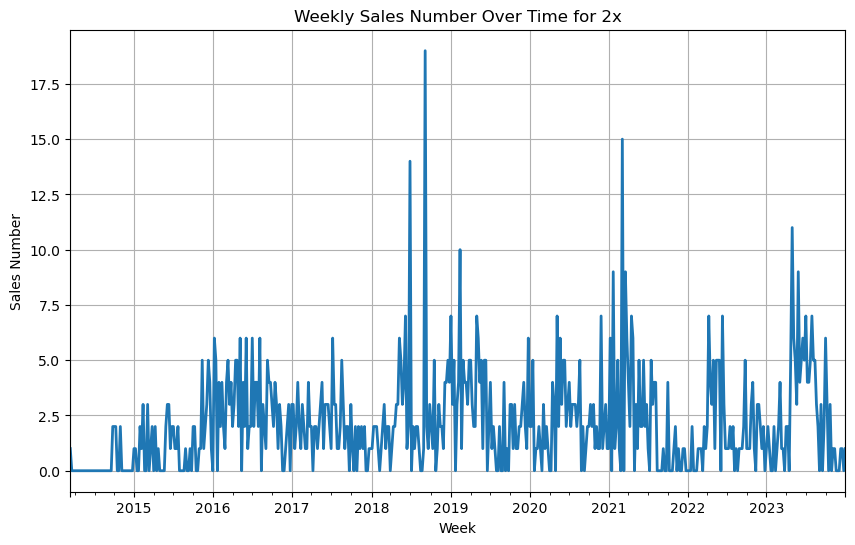

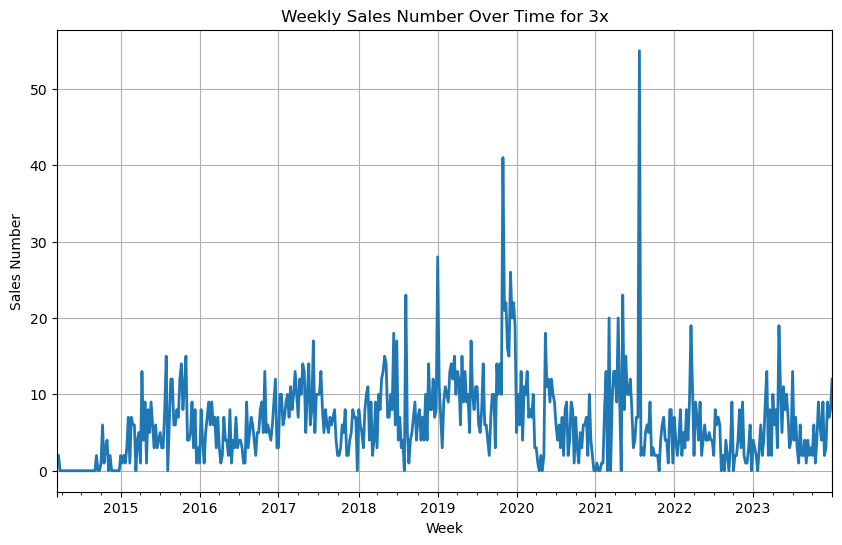

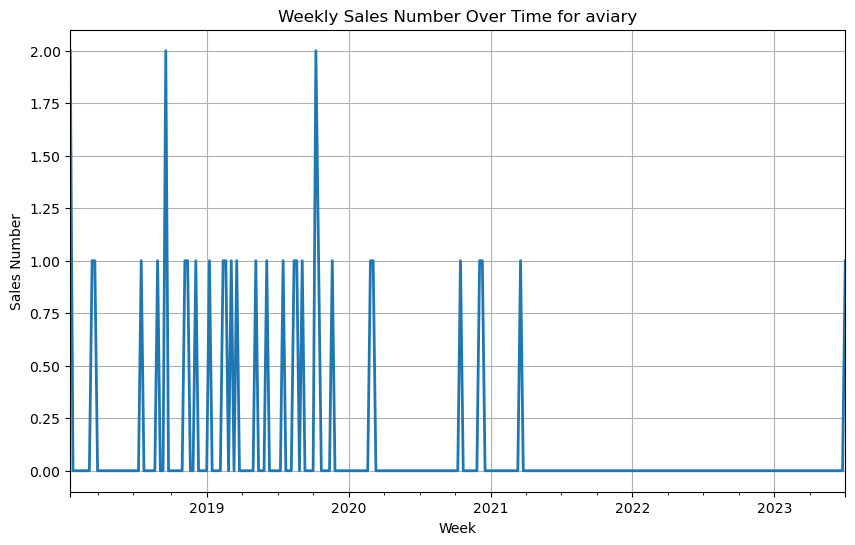

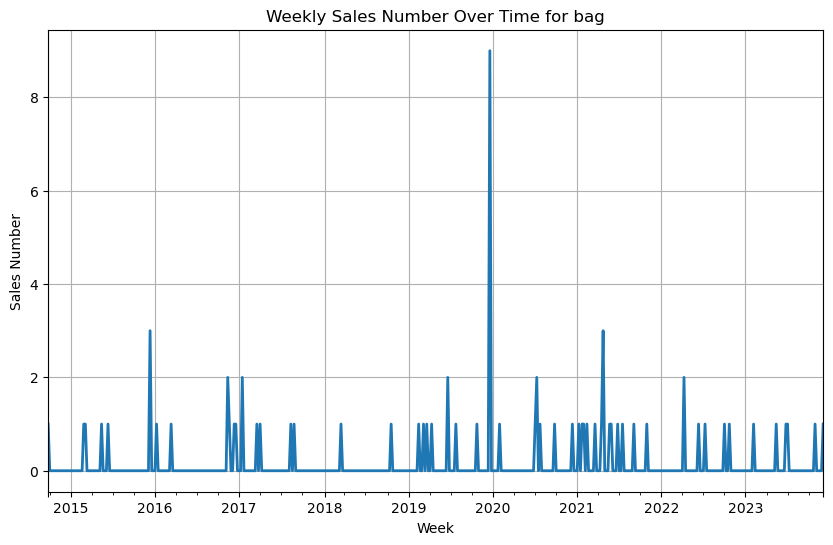

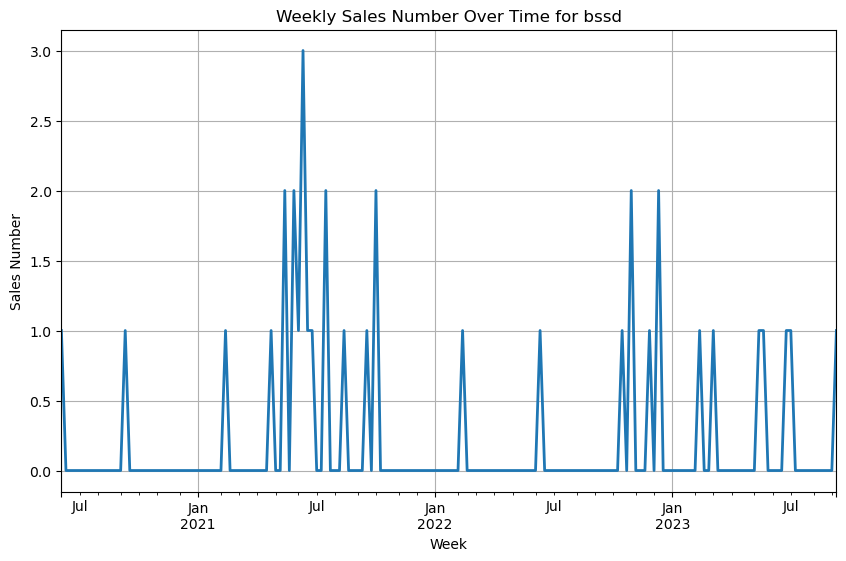

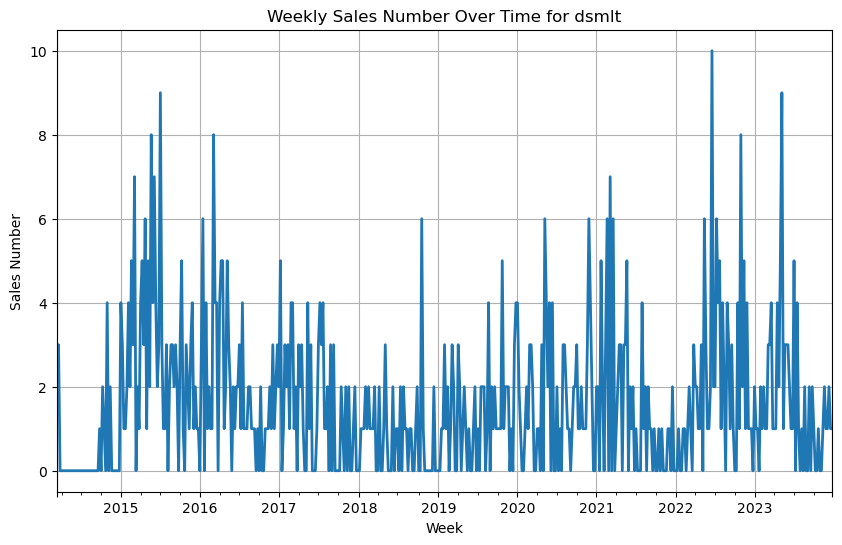

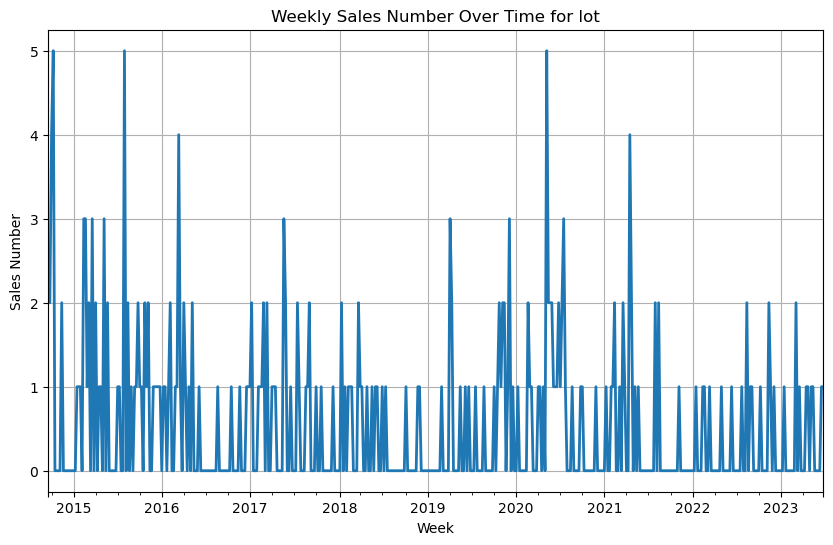

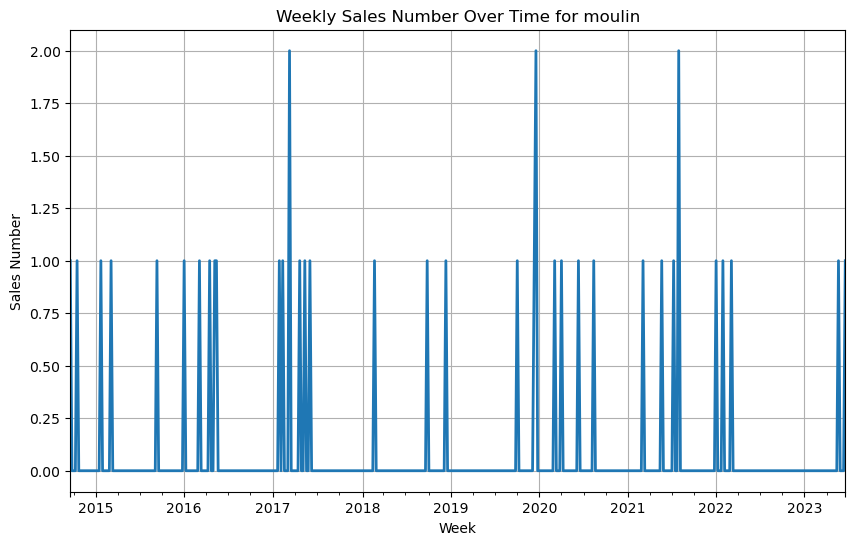

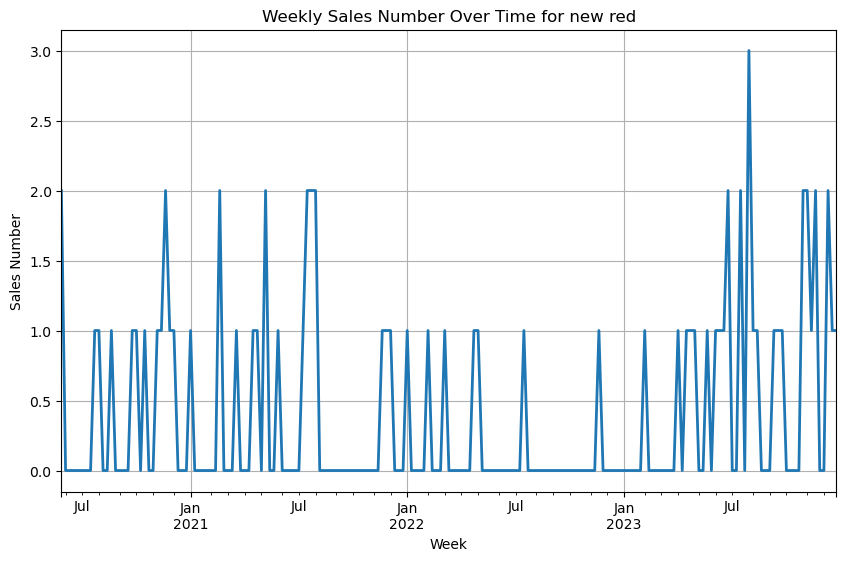

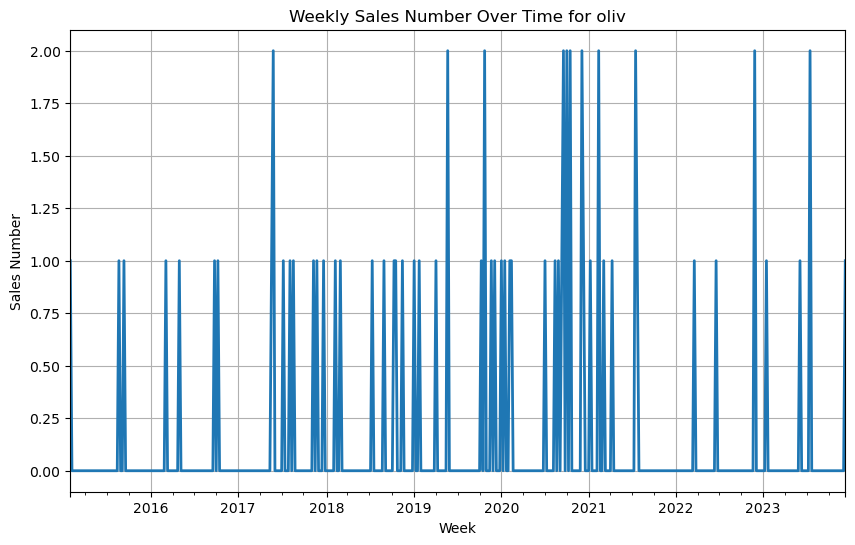

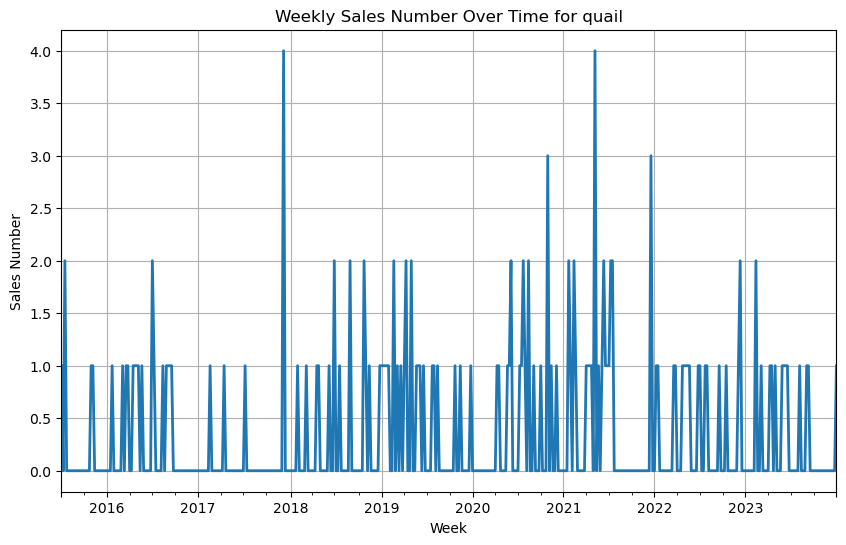

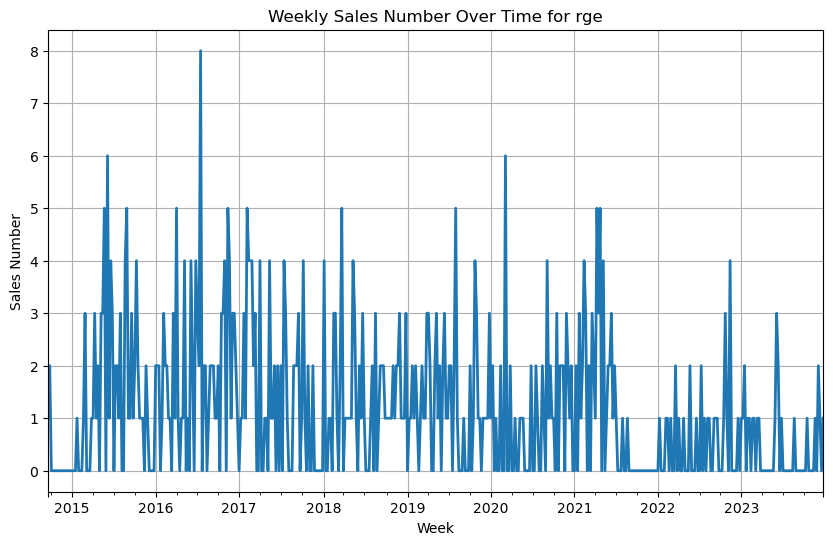

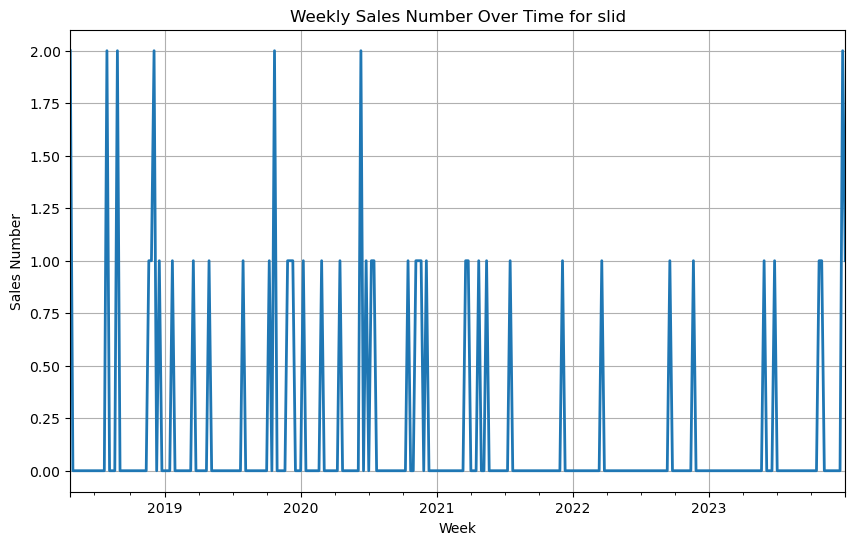

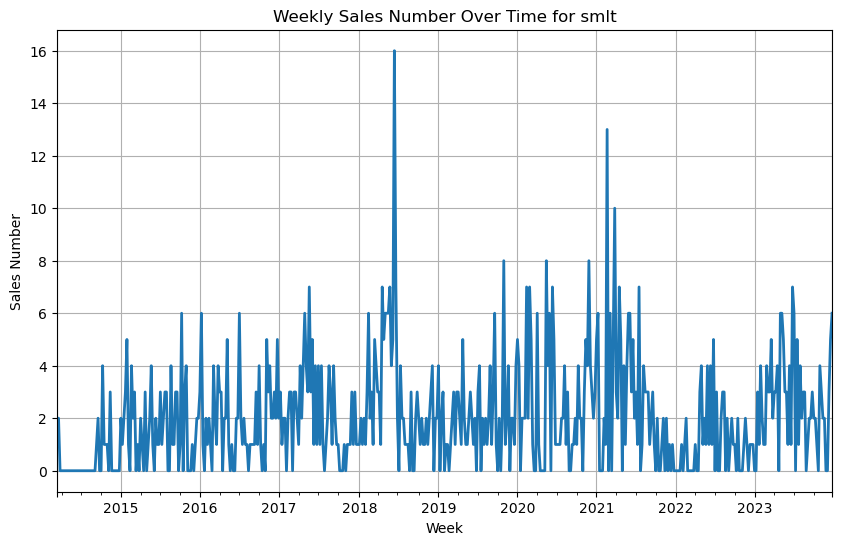

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Loop through each product's dataframe and perform EDA
for product, group in grouped:    
    # Aggregate sales numbers by week
    weekly_sales = group['sales_number'].resample('W').sum()
    
    # Plot the weekly aggregated Time Series Data
    plt.figure(figsize=(10, 6))
    weekly_sales.plot(title=f'Weekly Sales Number Over Time for {product}', lw=2)
    plt.xlabel('Week')
    plt.ylabel('Sales Number')
    plt.grid(True)
    plt.show()


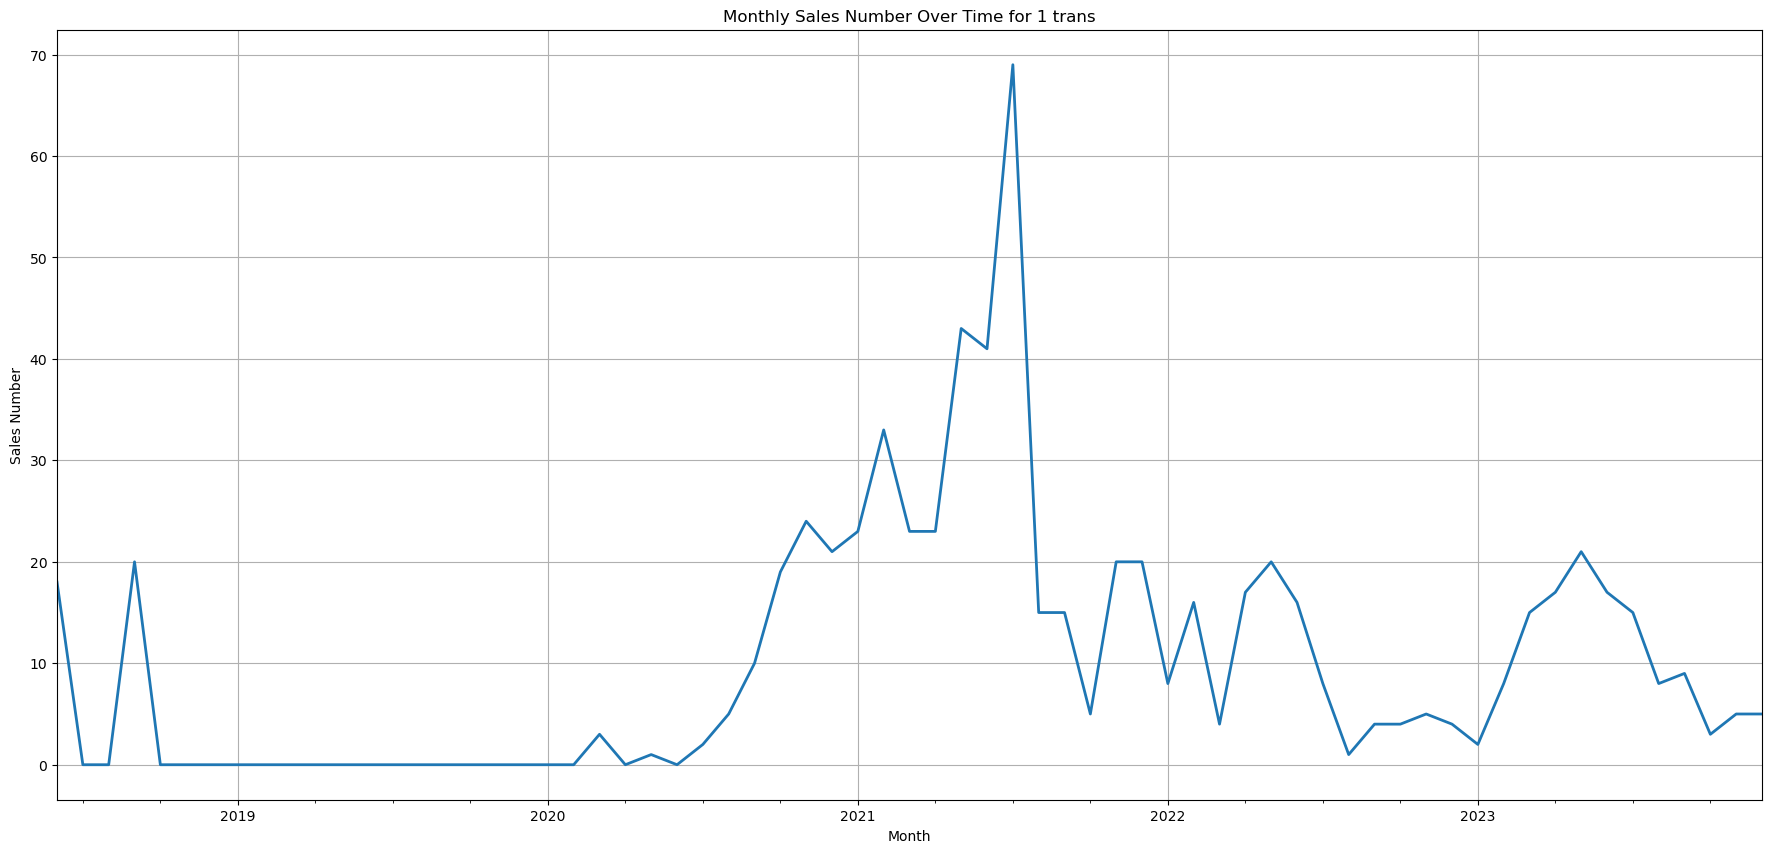

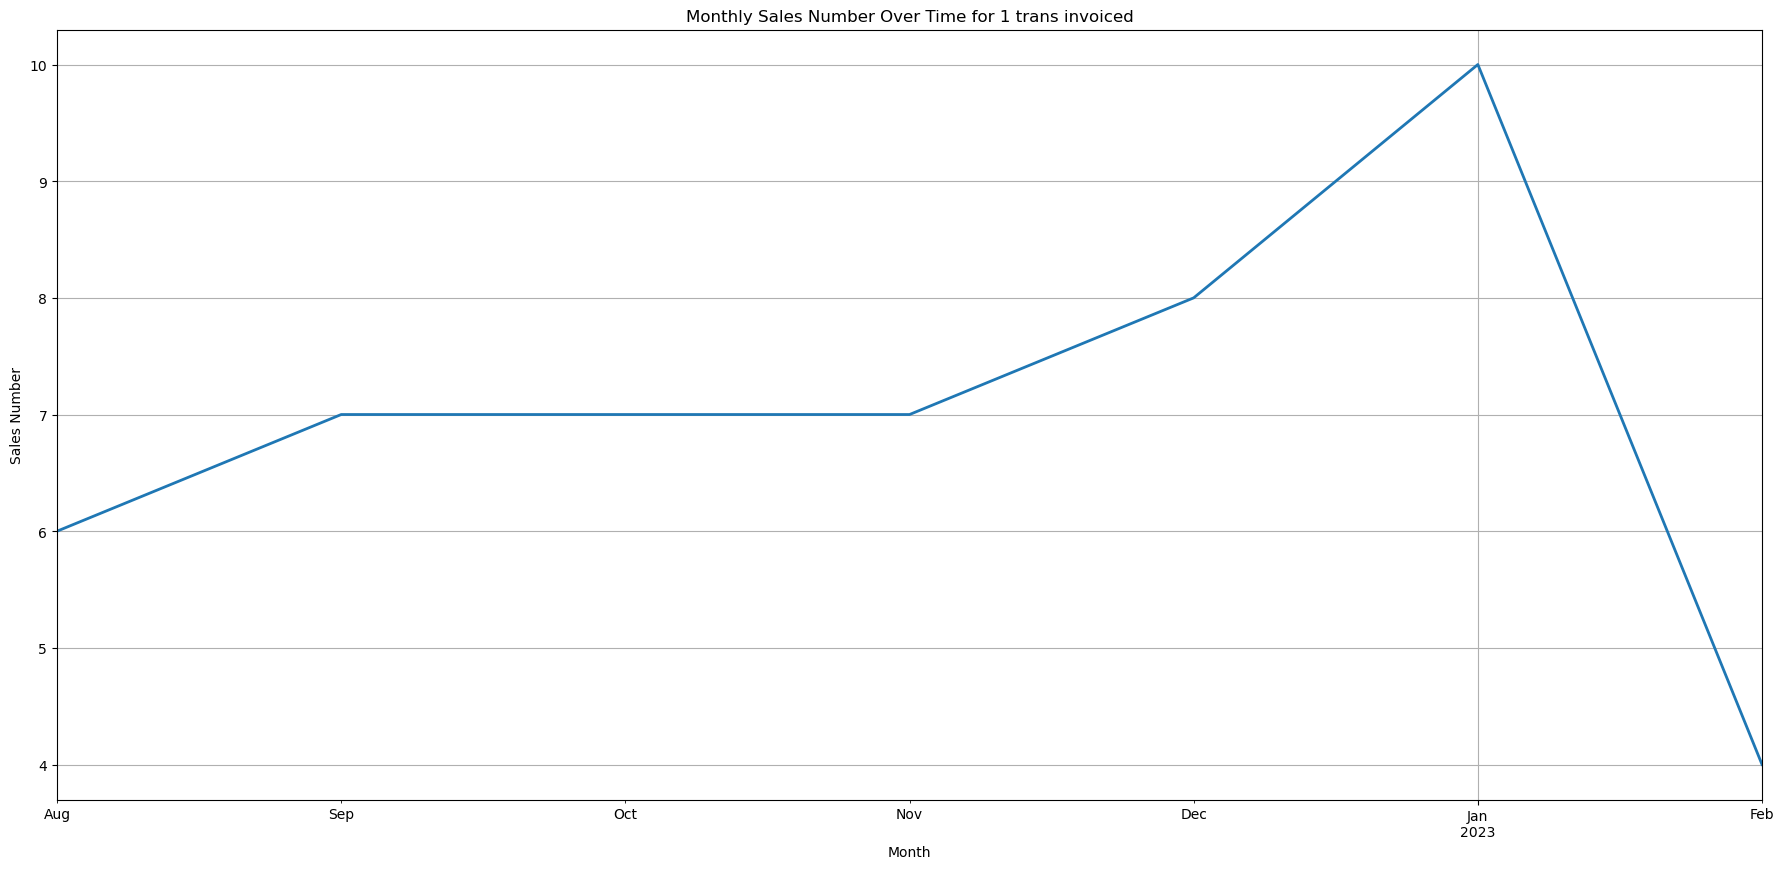

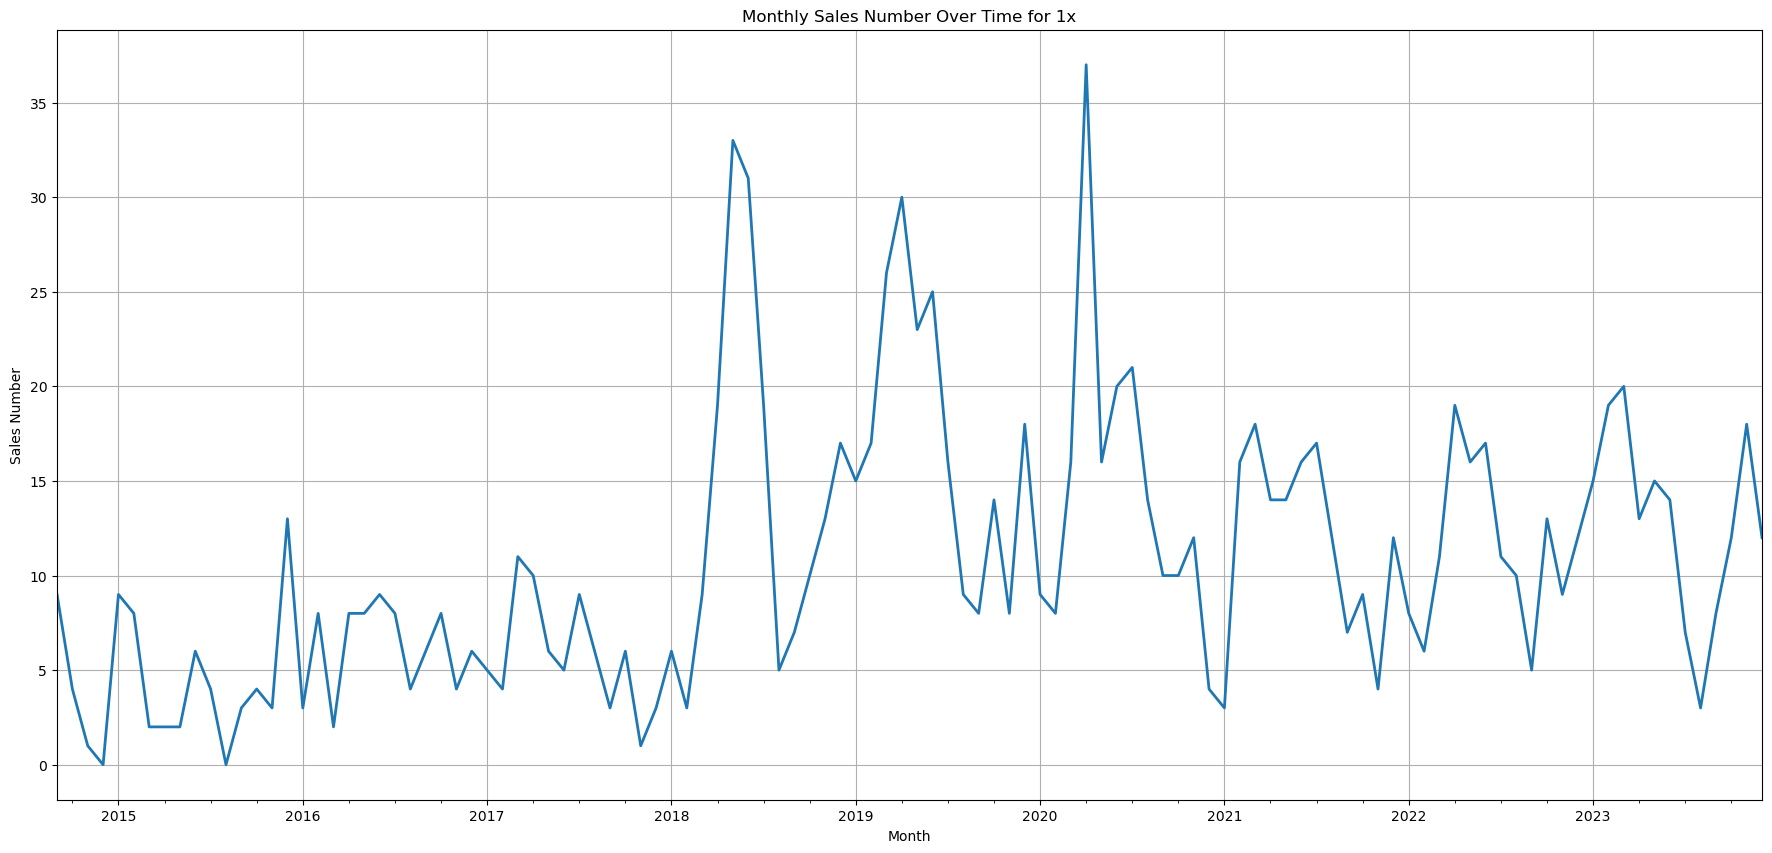

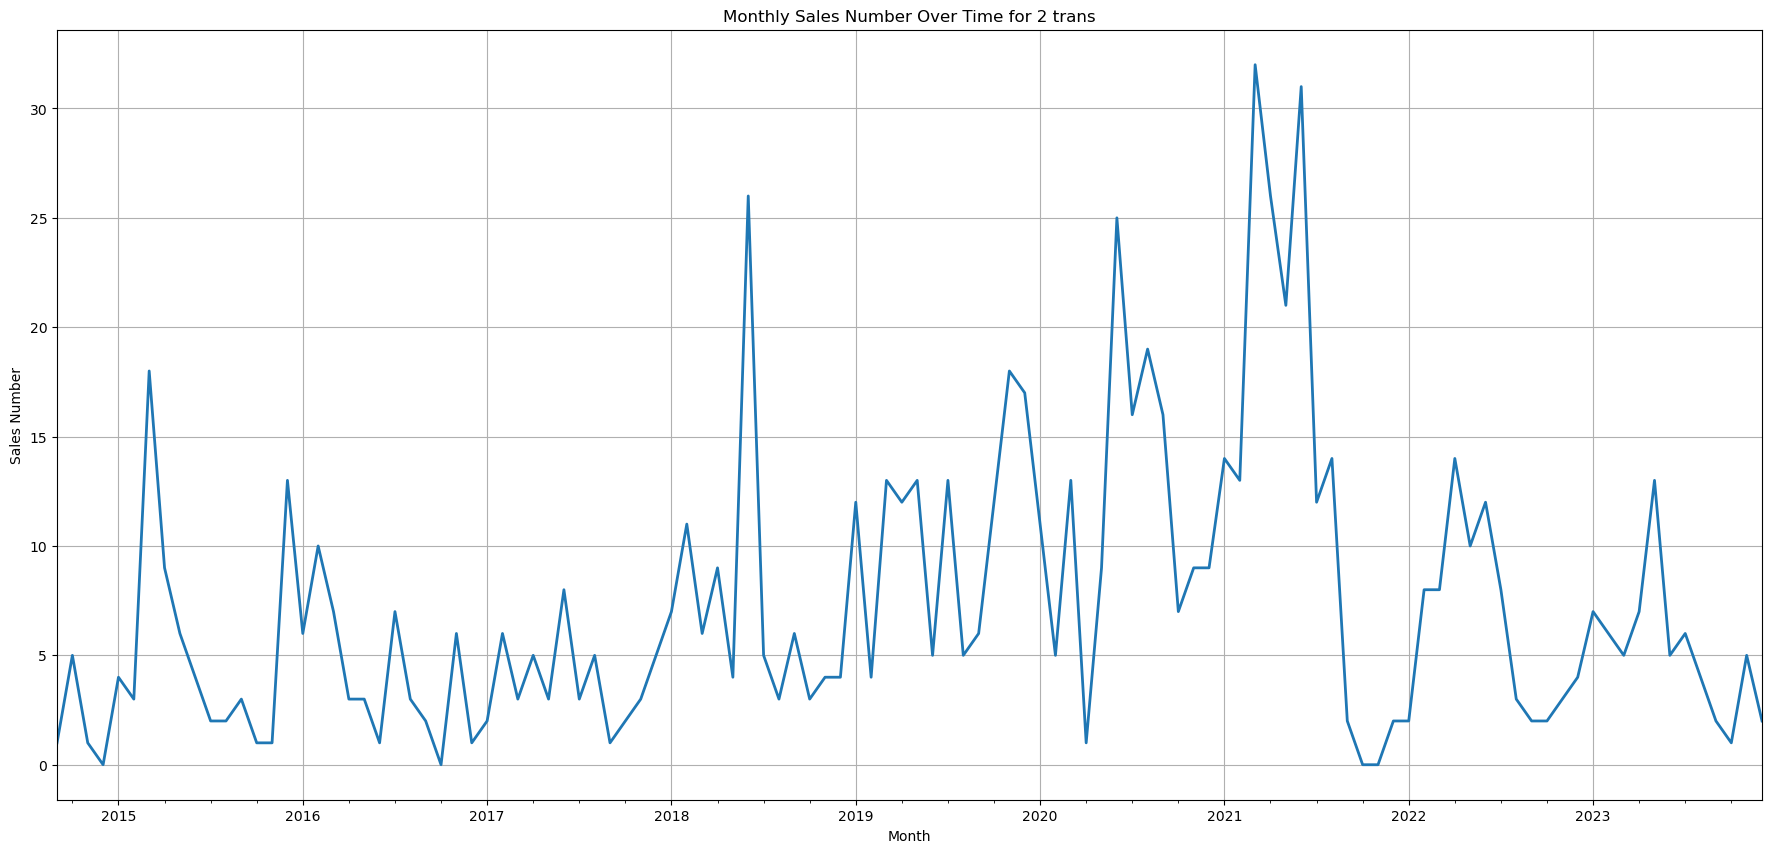

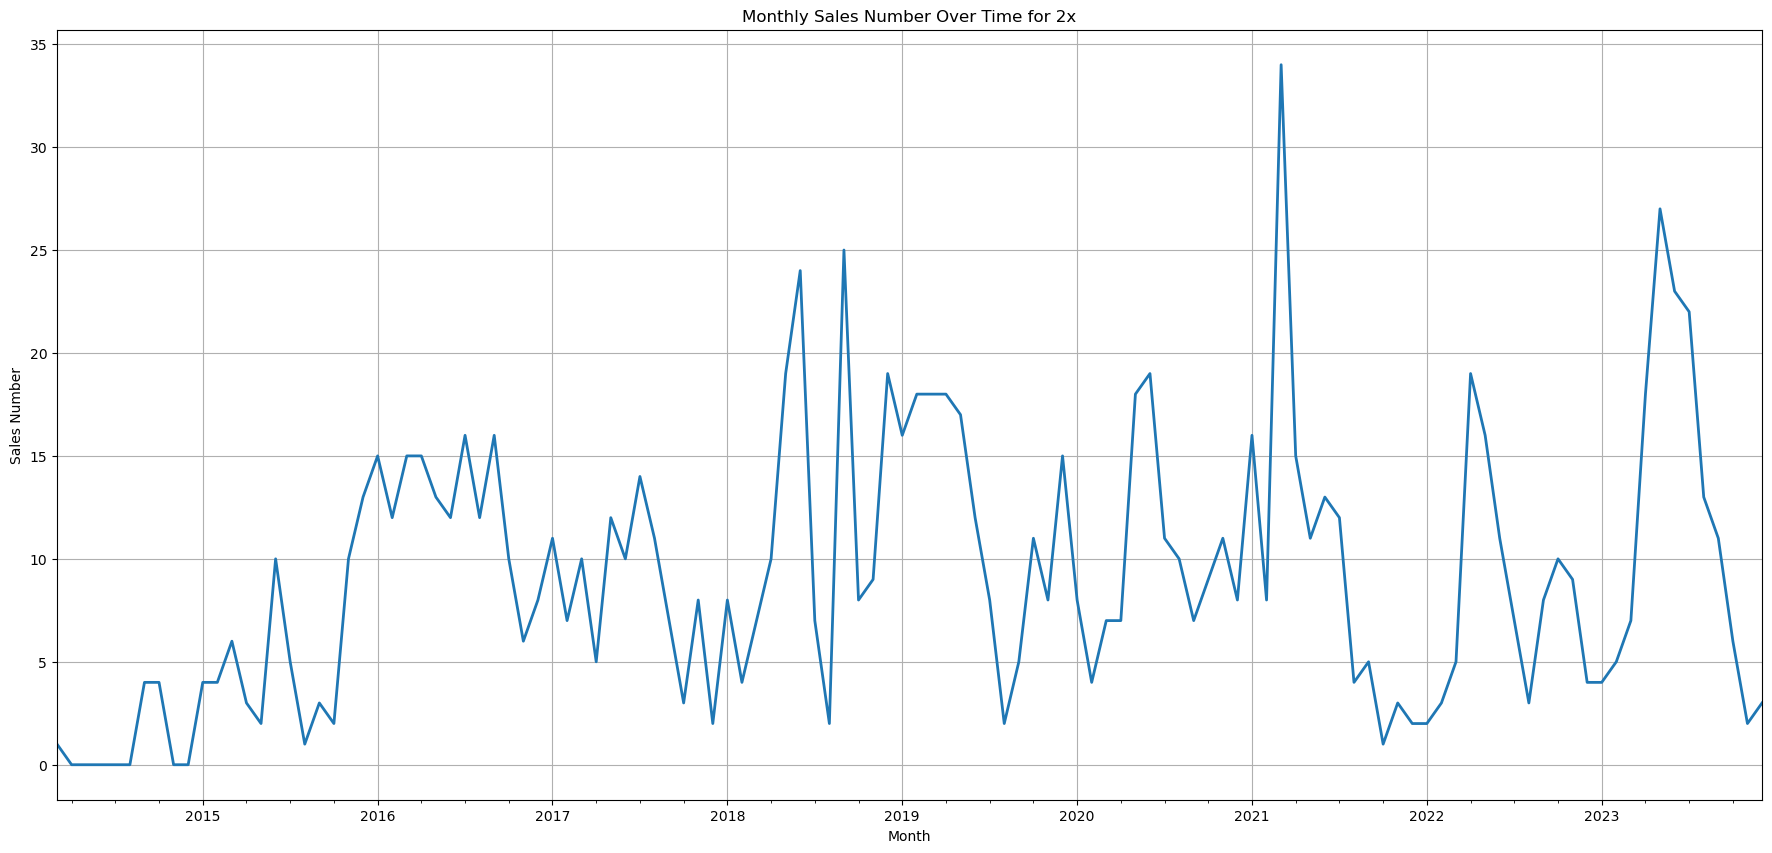

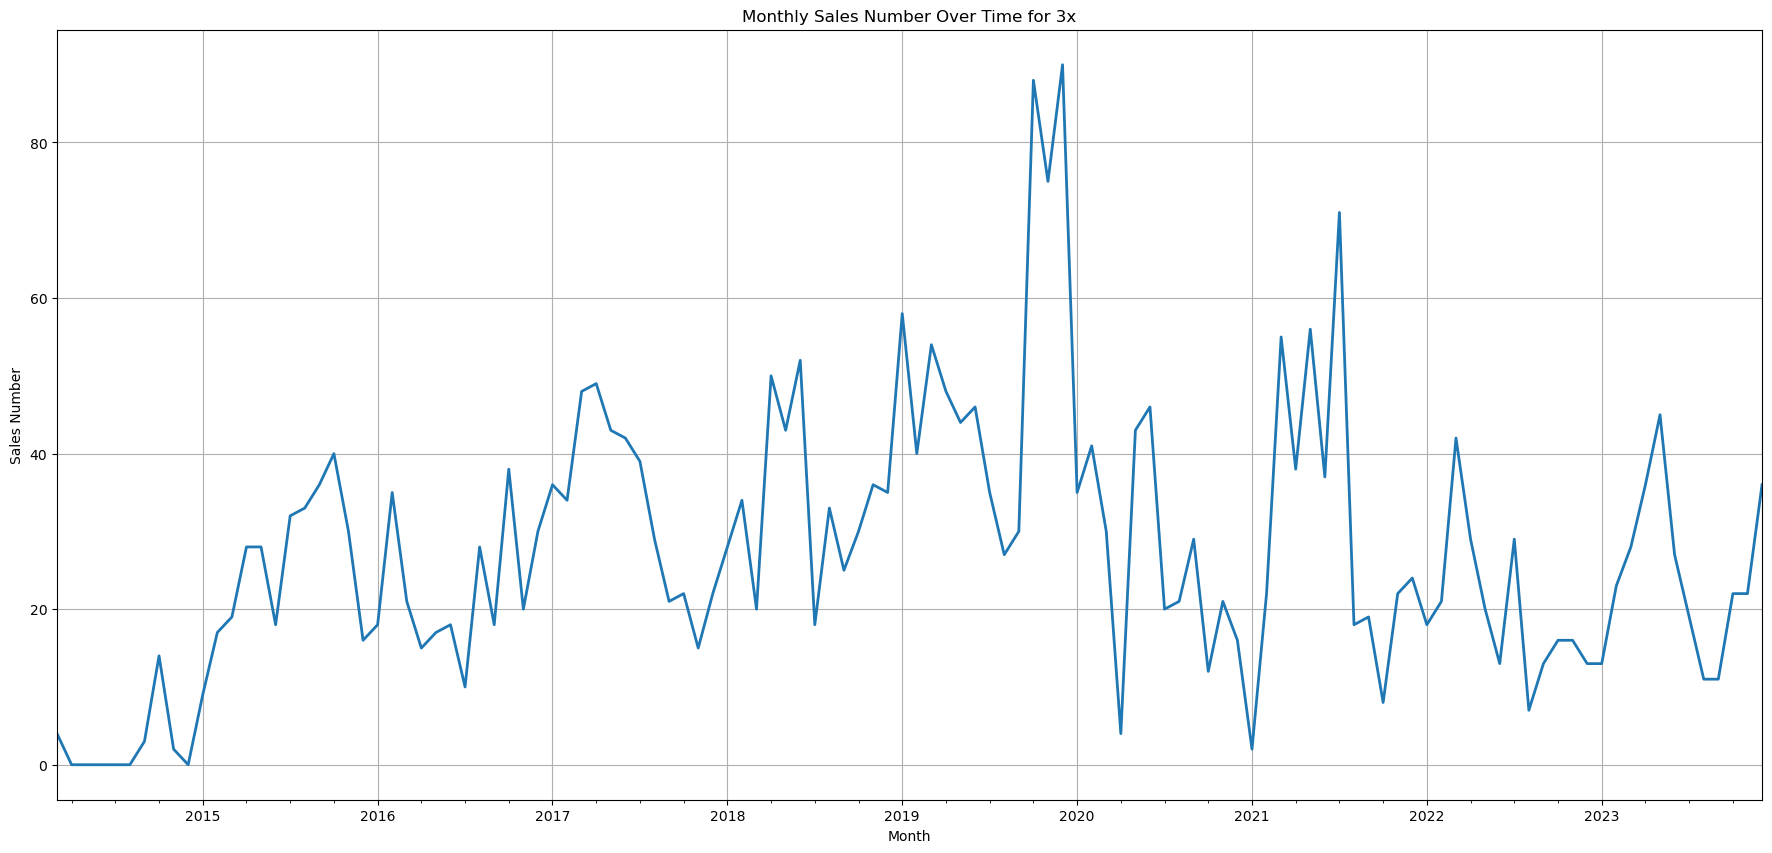

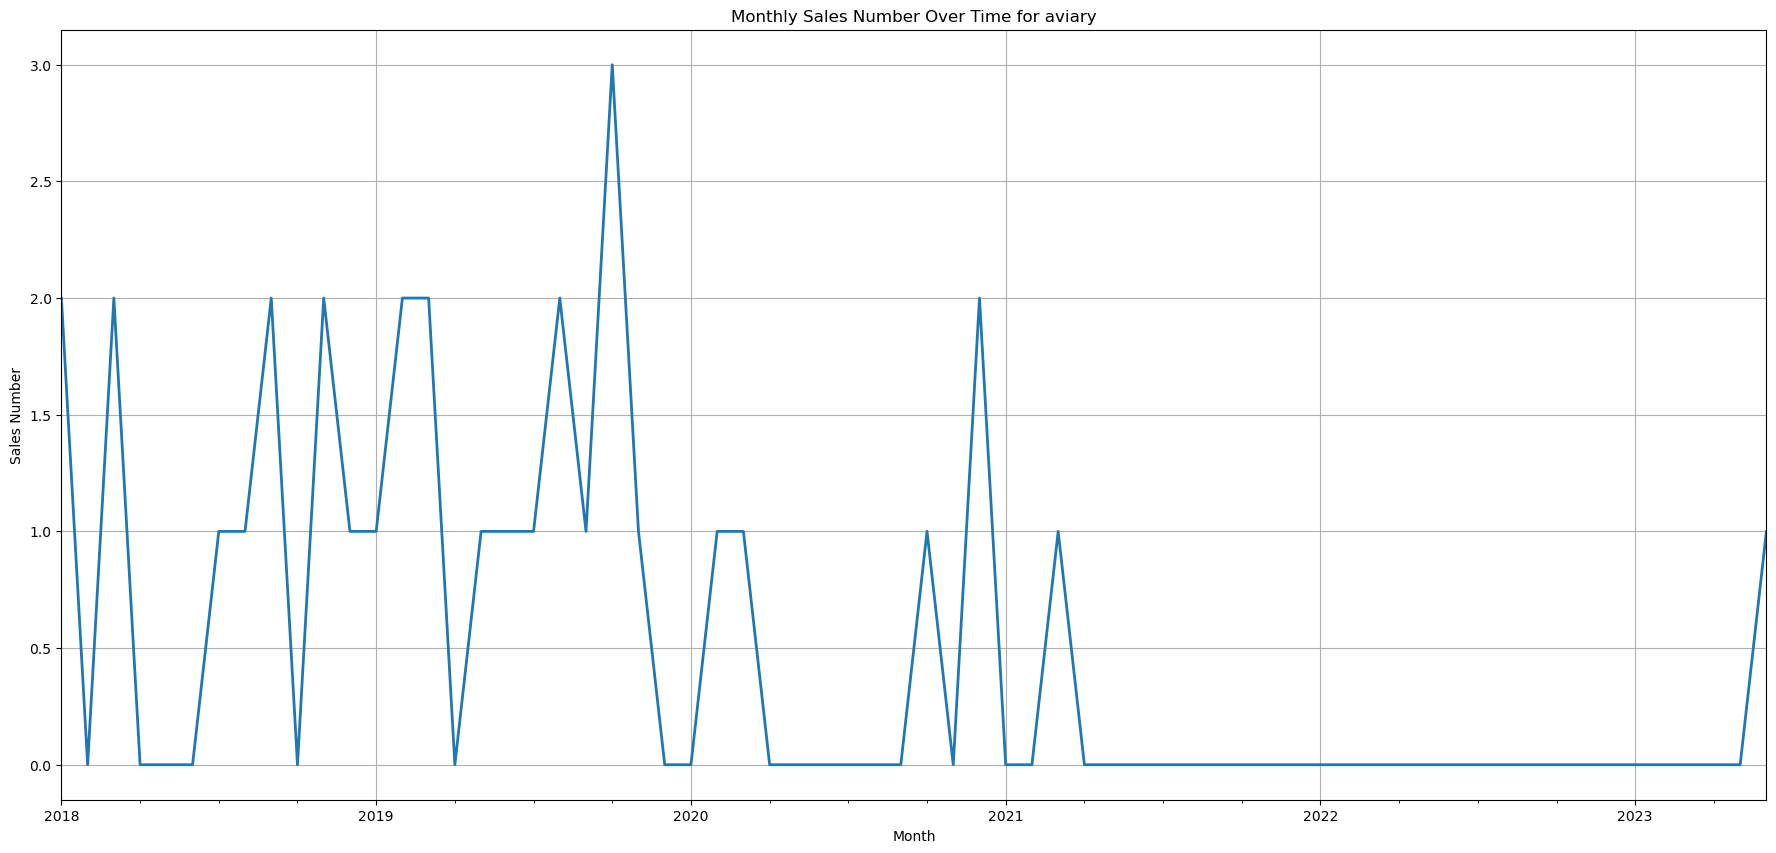

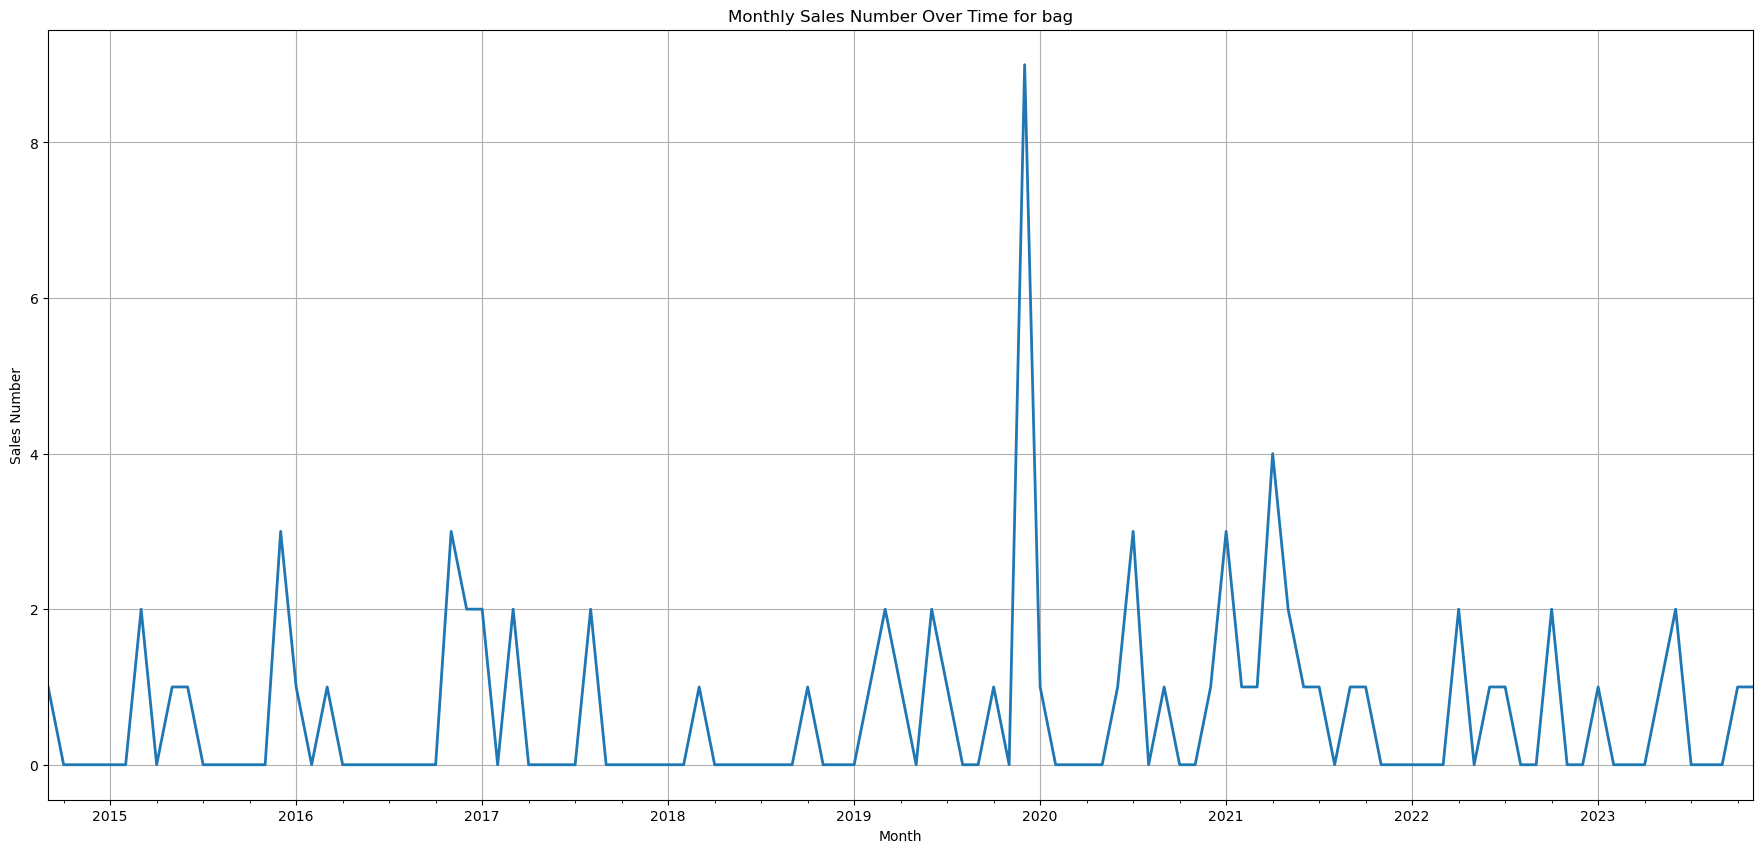

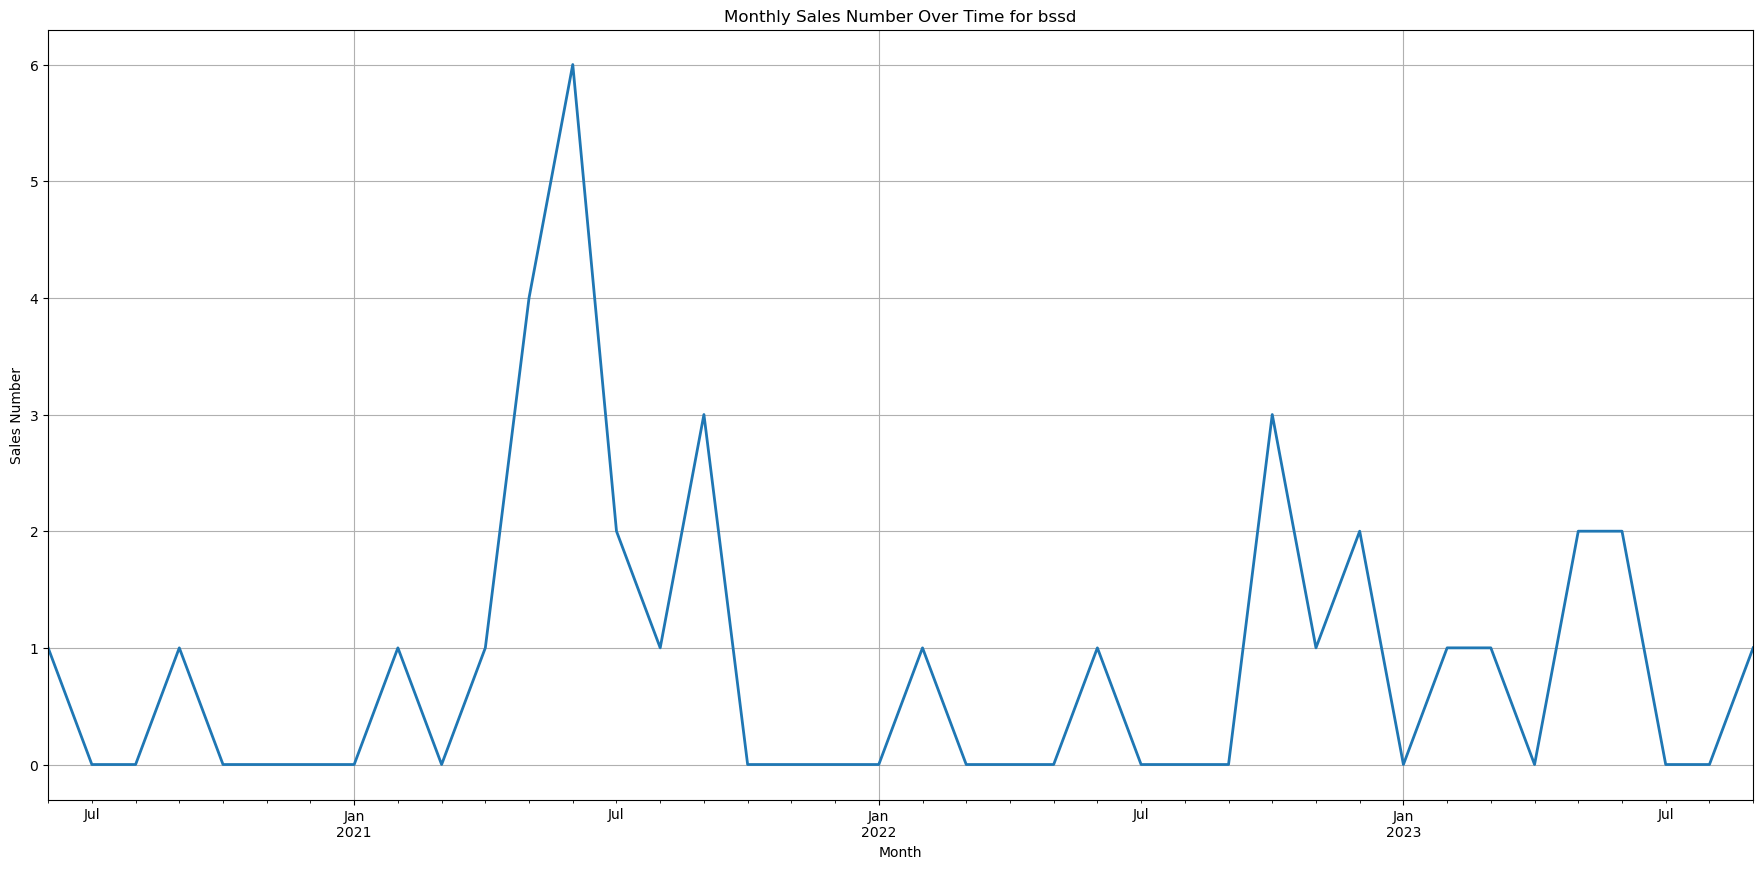

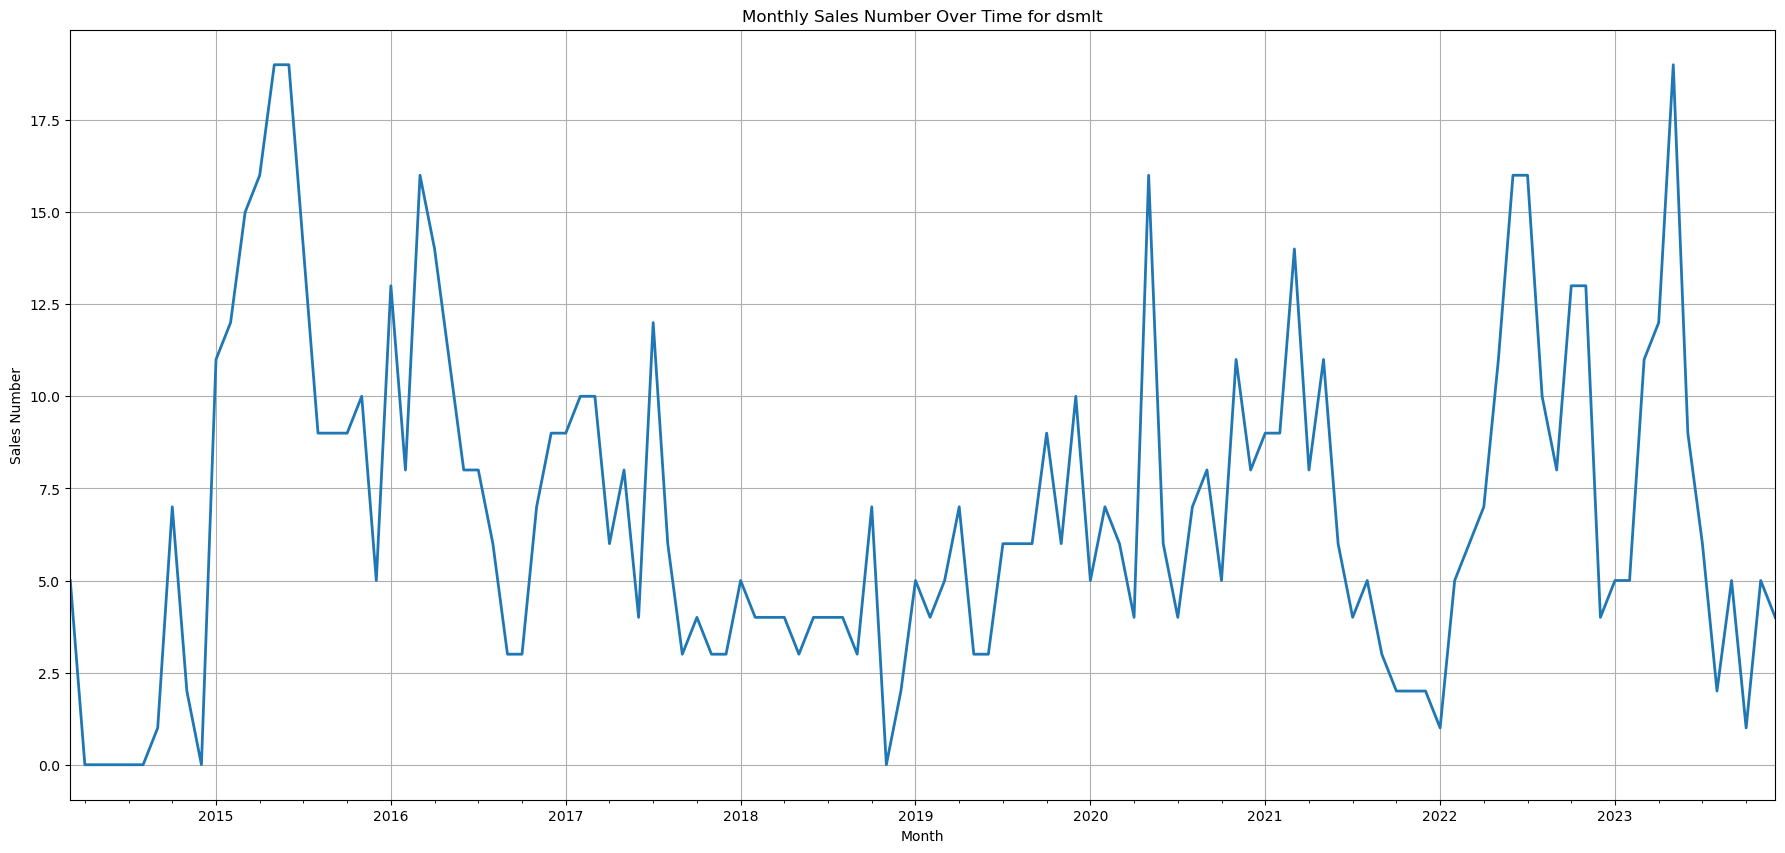

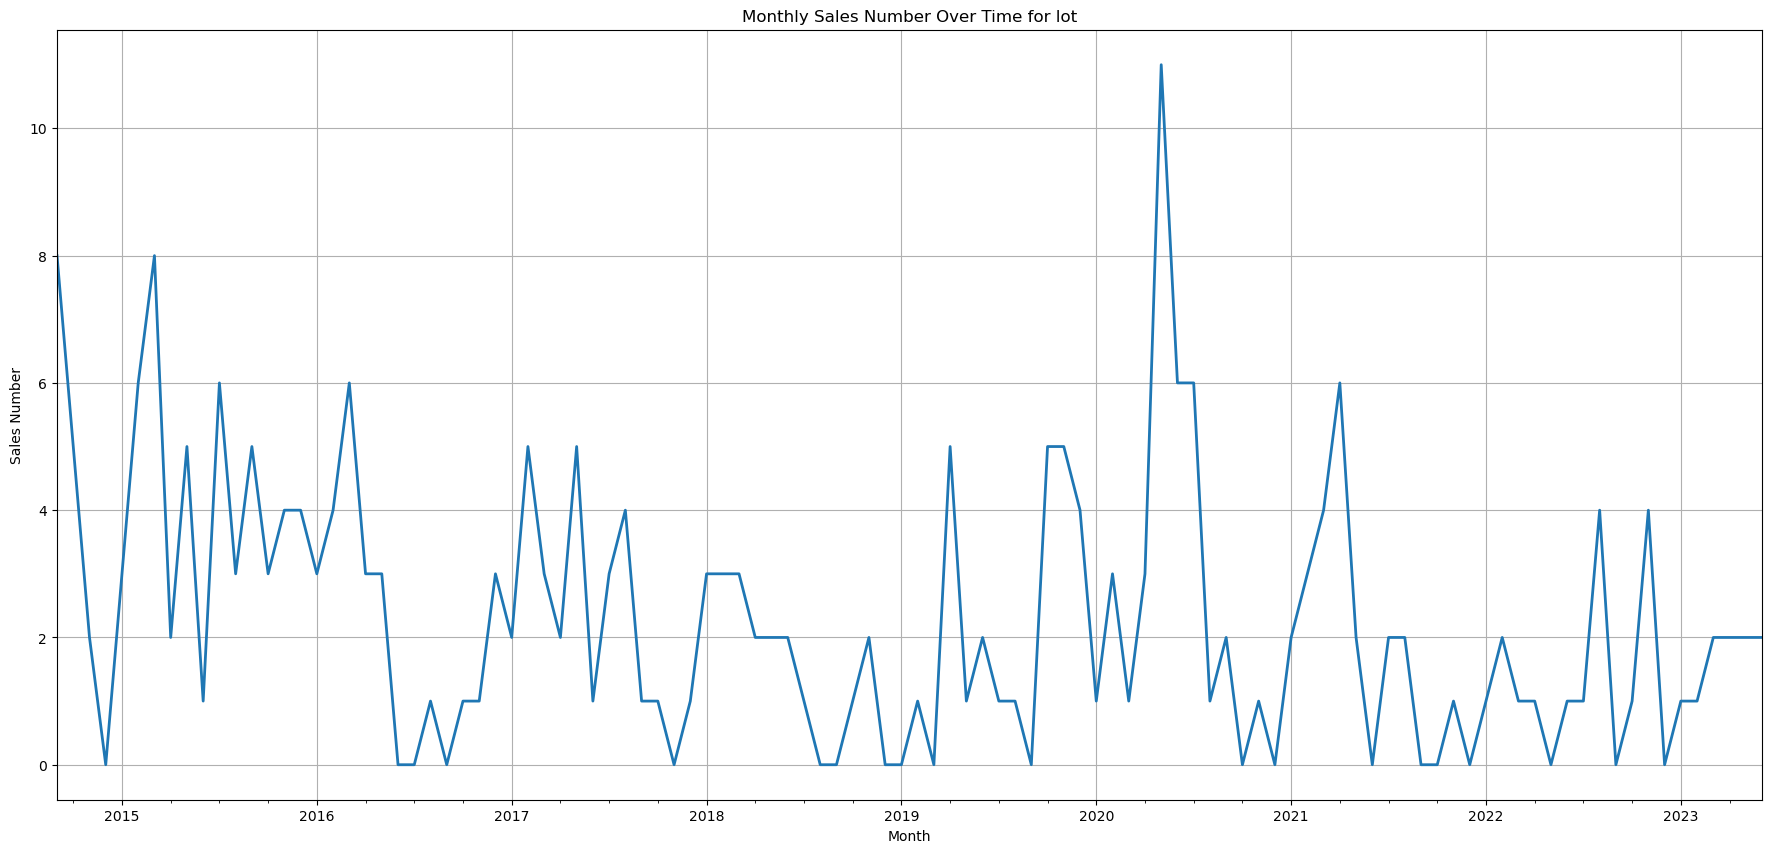

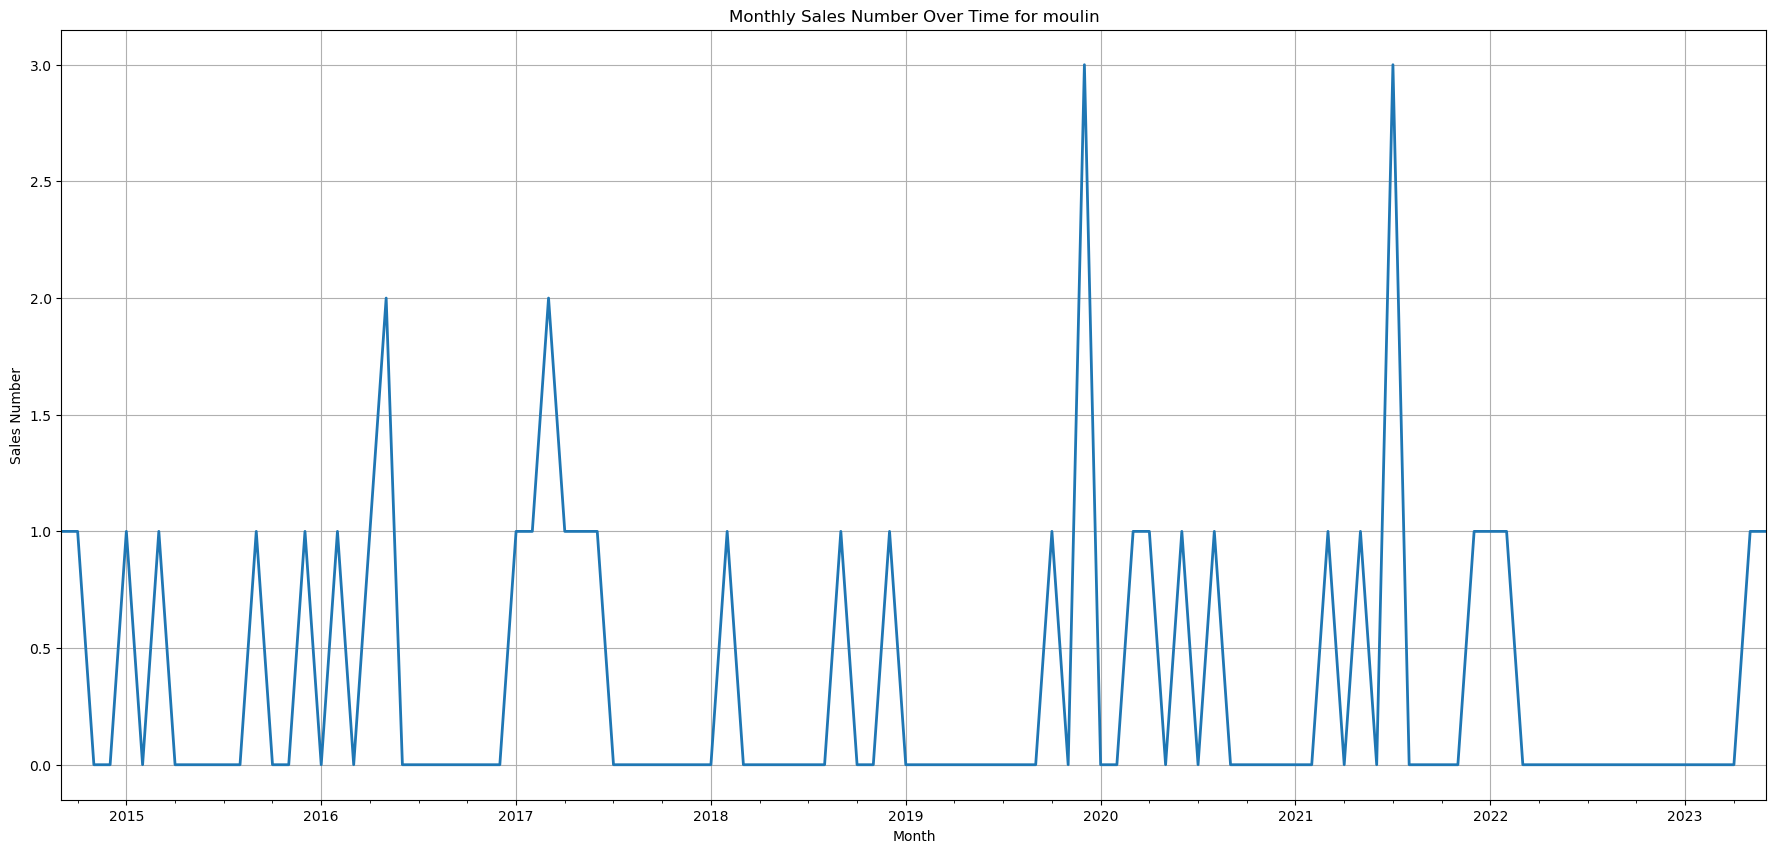

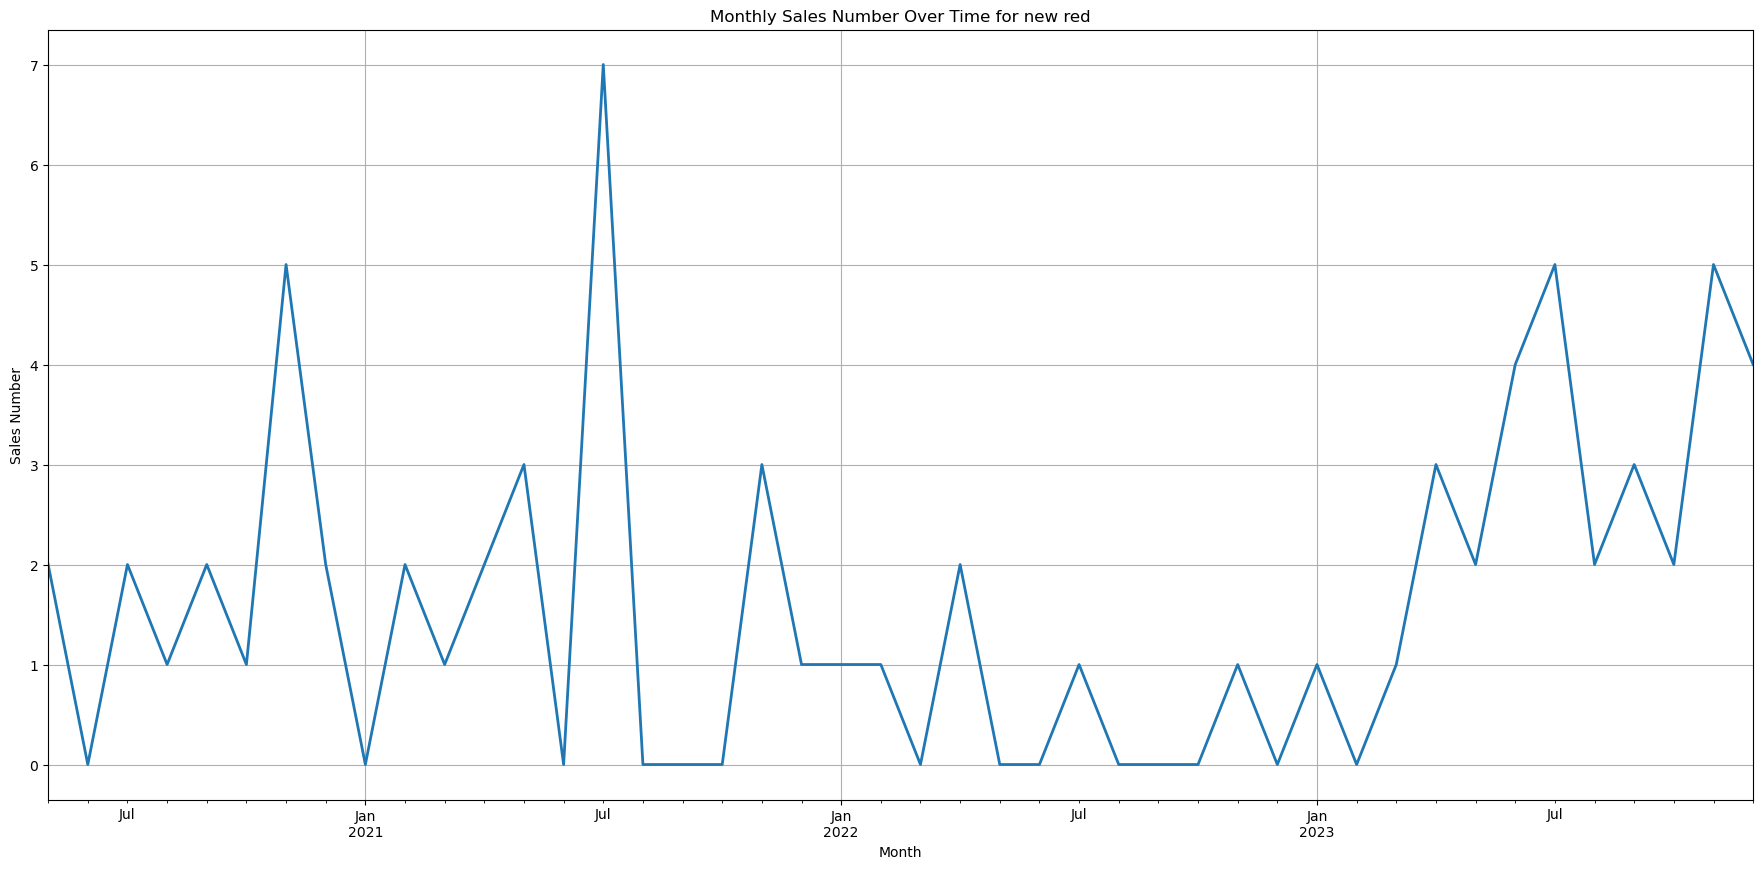

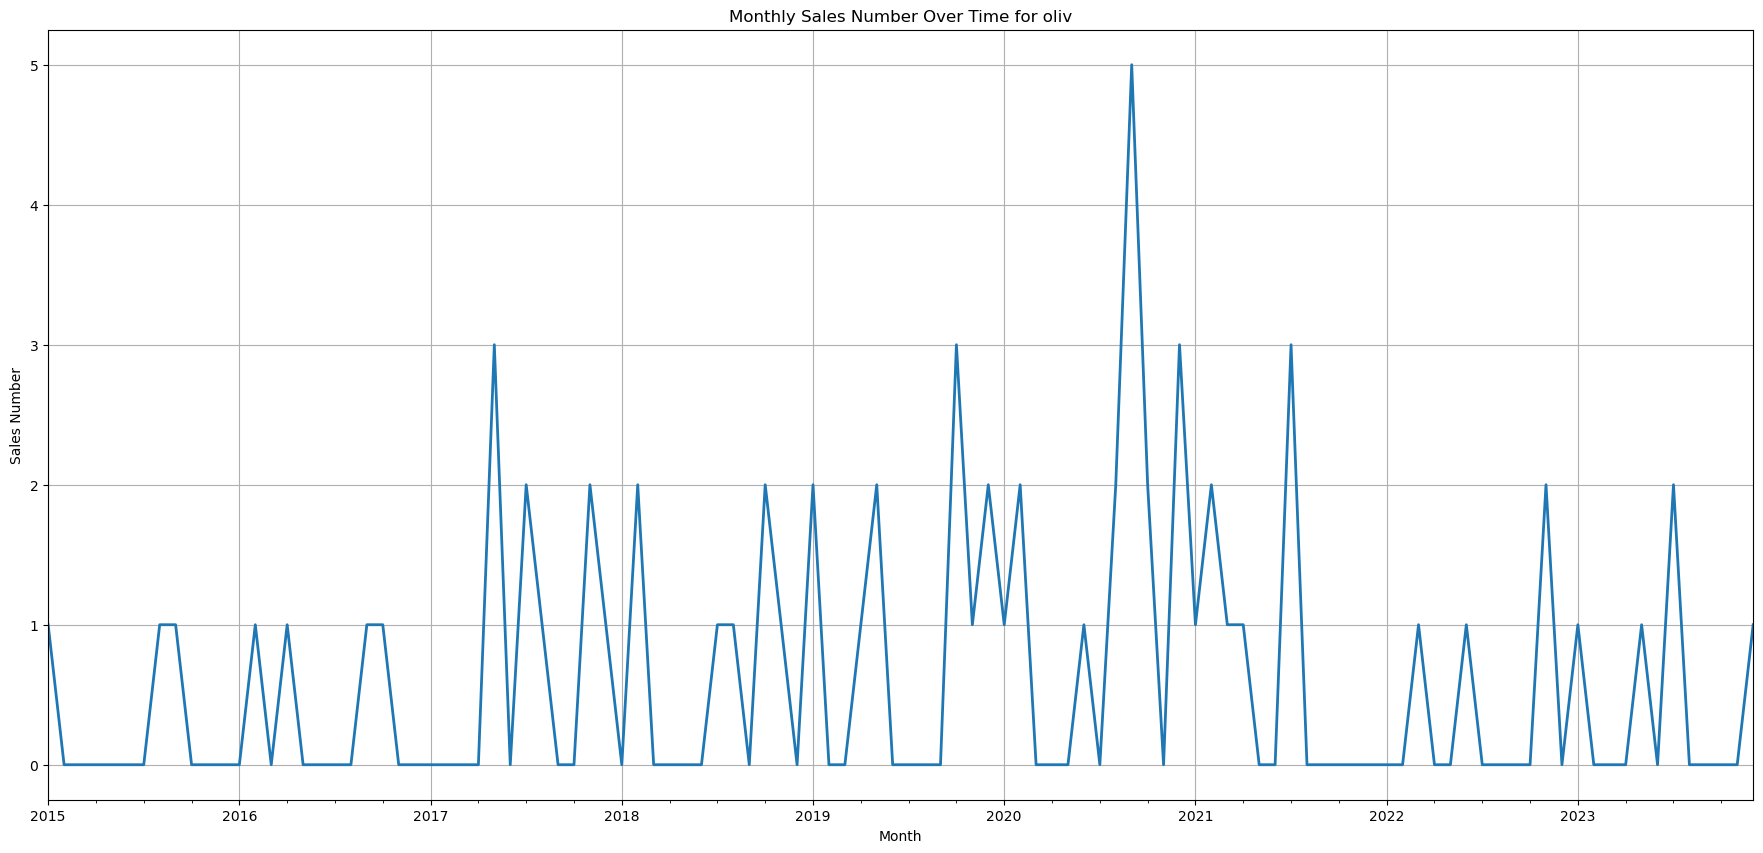

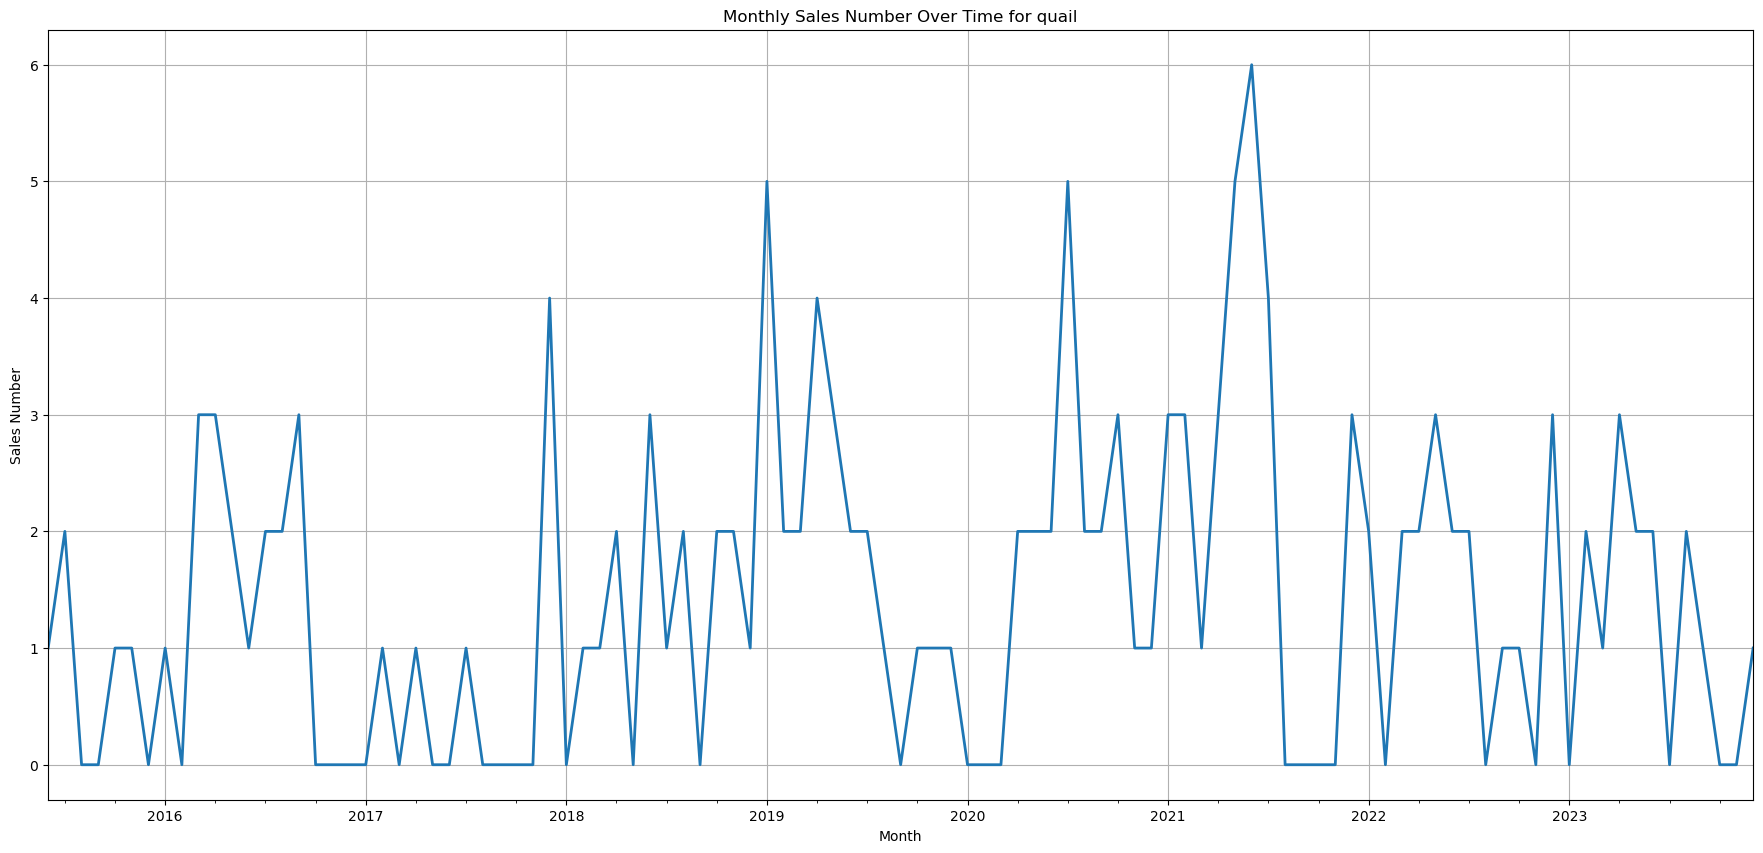

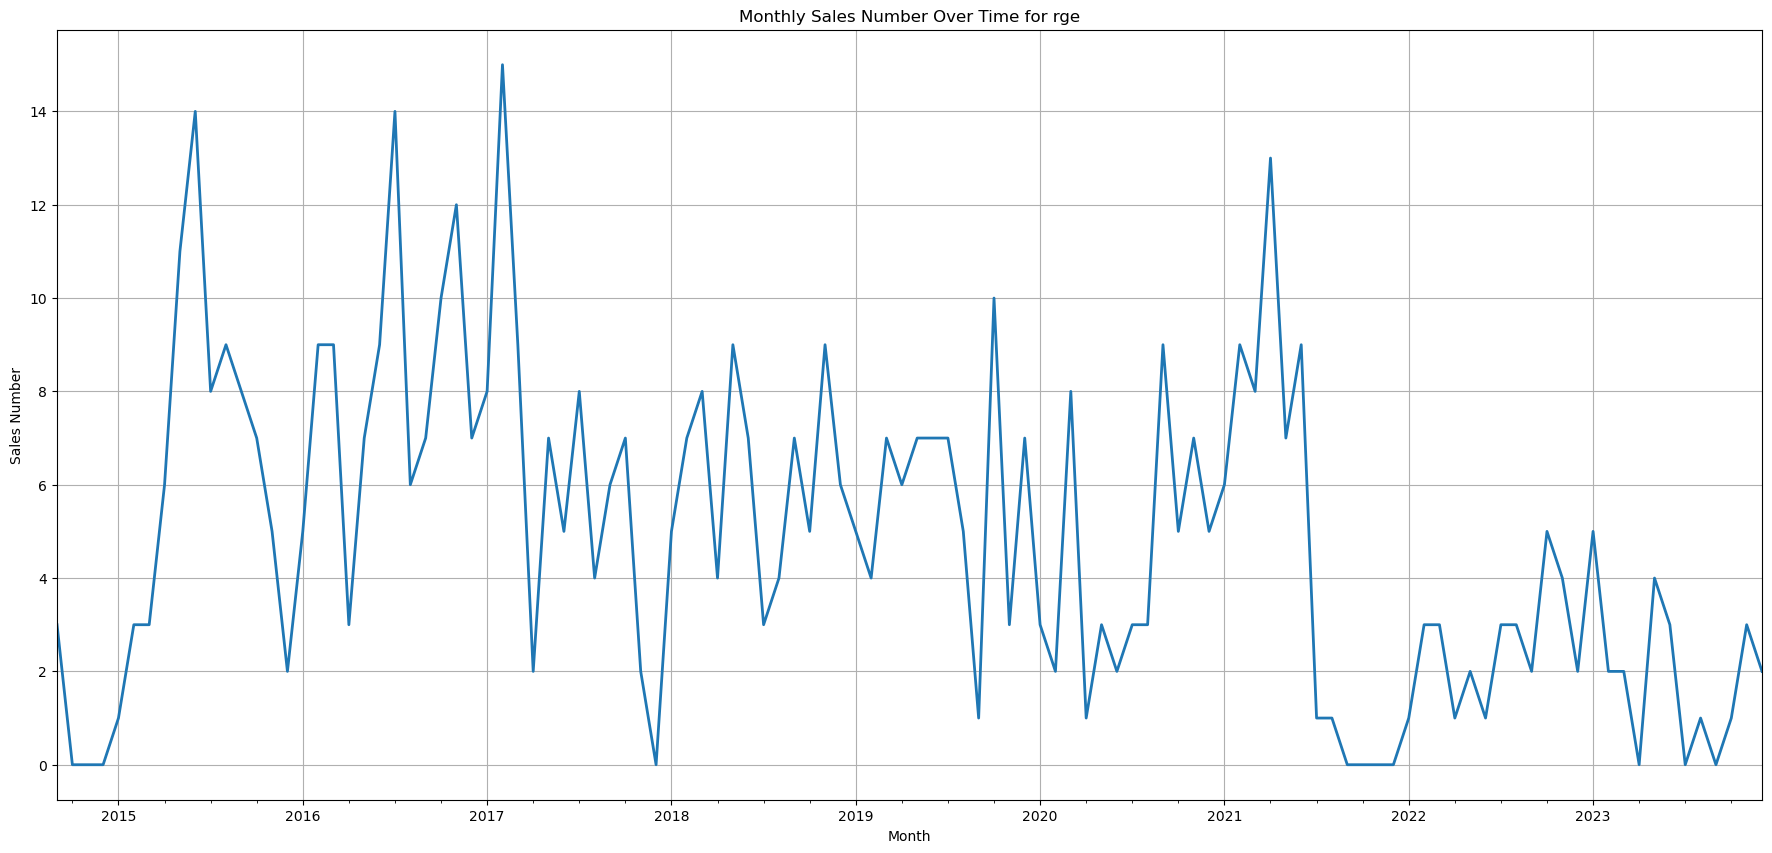

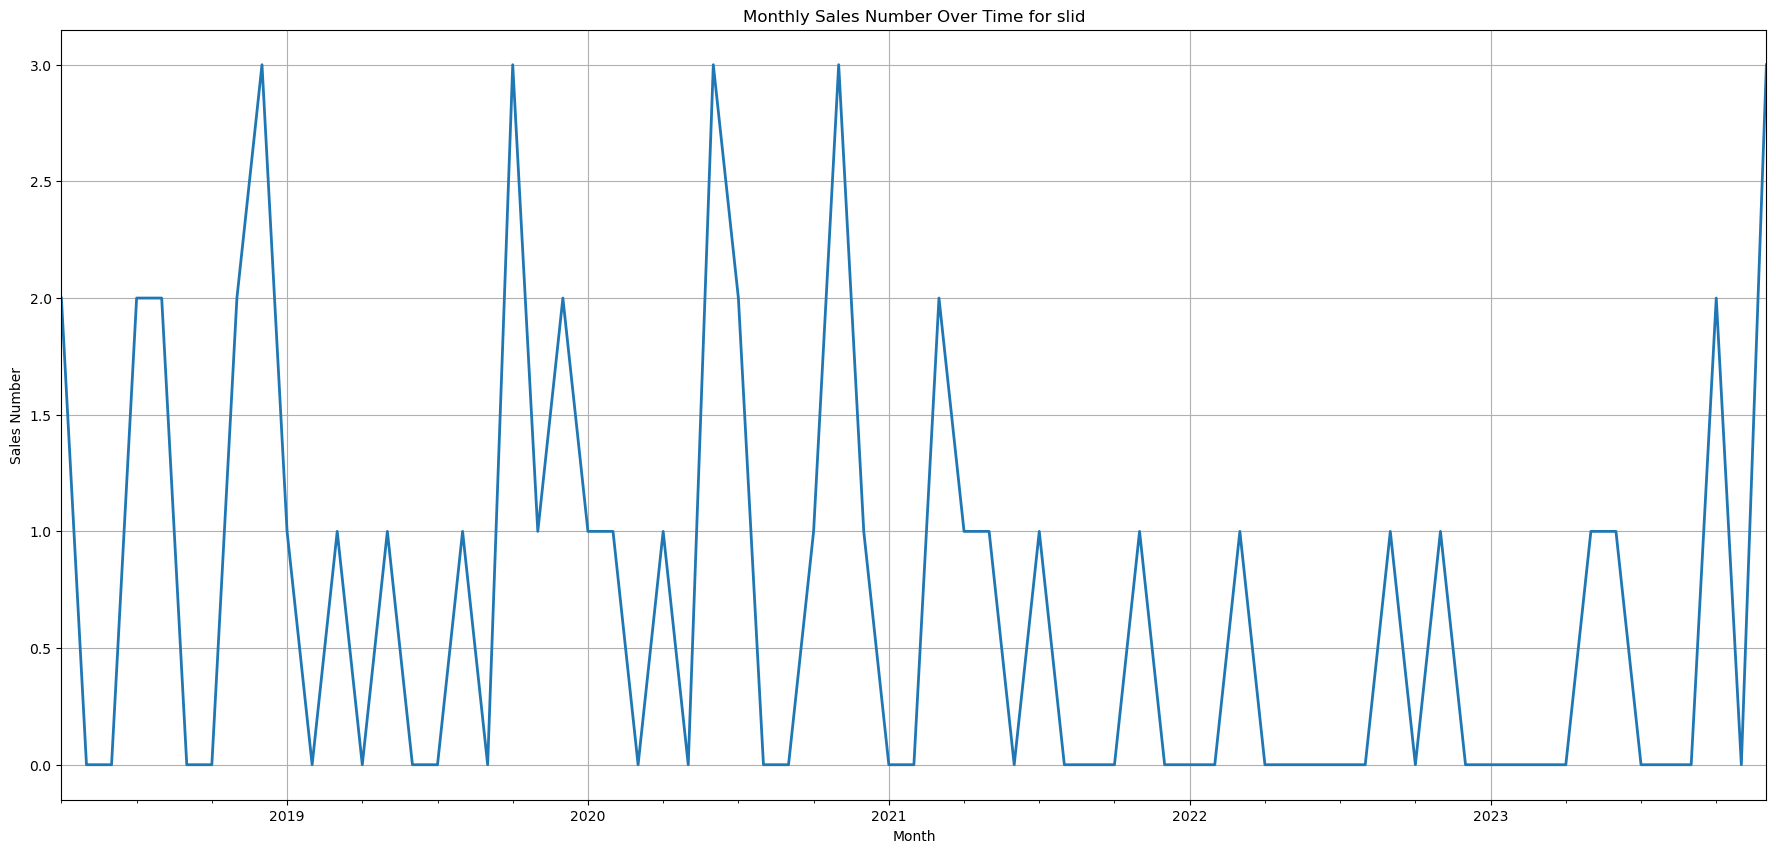

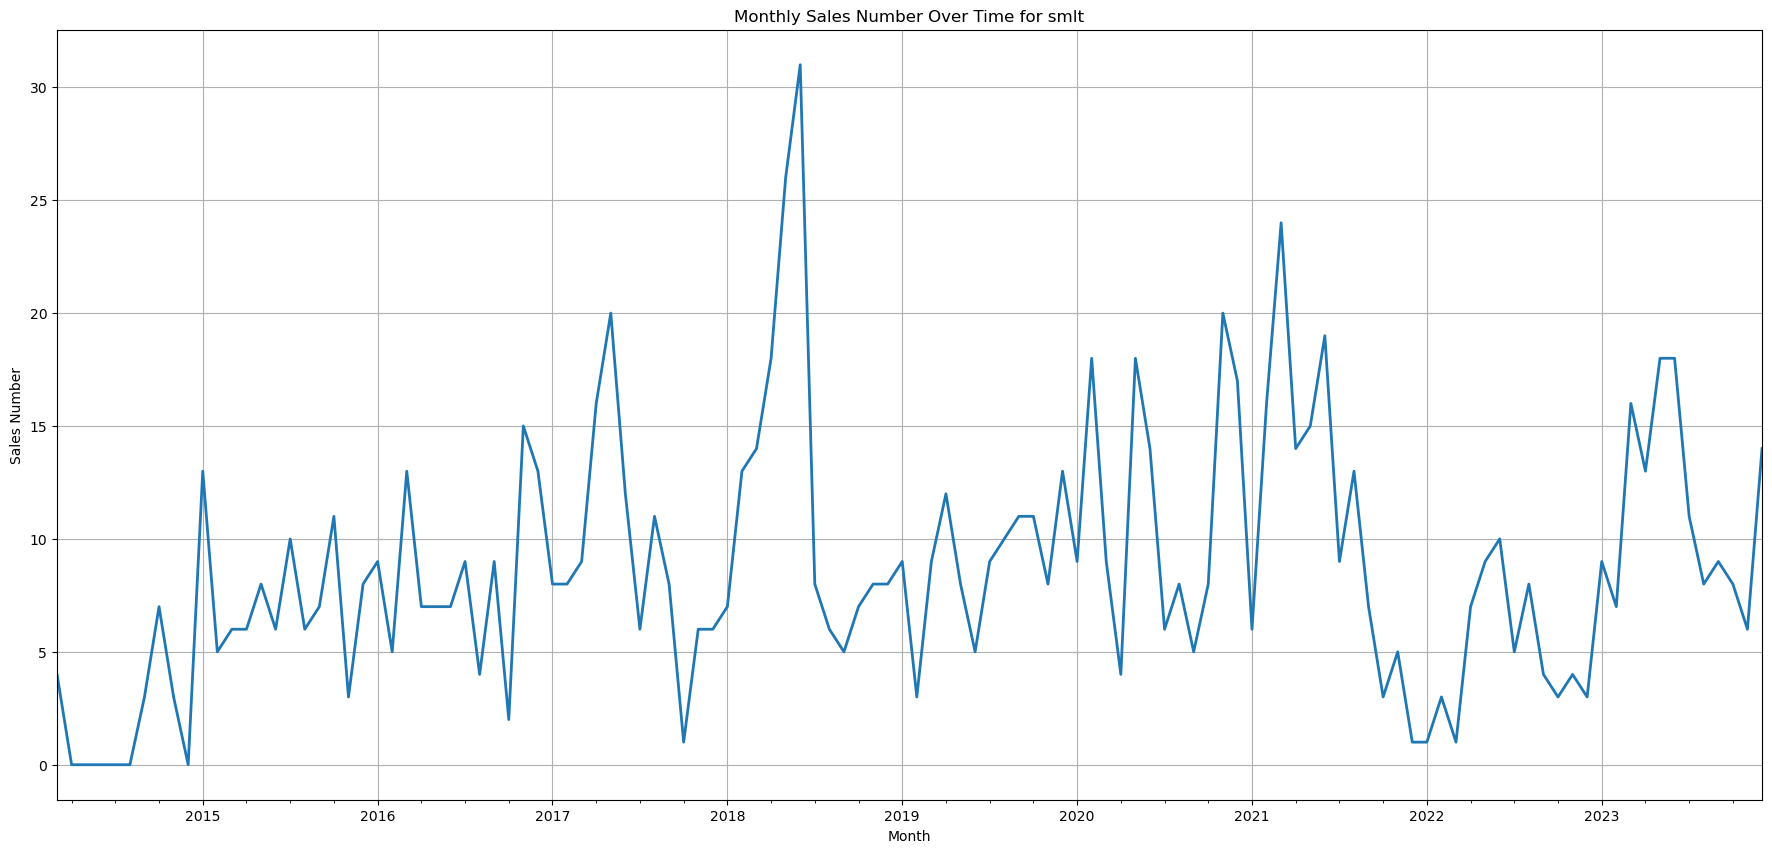

In [31]:
# per mounth 

# Loop through each product's dataframe and perform EDA
for product, group in grouped:    
    # Aggregate sales numbers by month
    monthly_sales = group['sales_number'].resample('M').sum()
    
    # Plot the monthly aggregated Time Series Data
    plt.figure(figsize=(22, 10))
    monthly_sales.plot(title=f'Monthly Sales Number Over Time for {product}', lw=2)
    plt.xlabel('Month')
    plt.ylabel('Sales Number')
    plt.grid(True)
    plt.show()

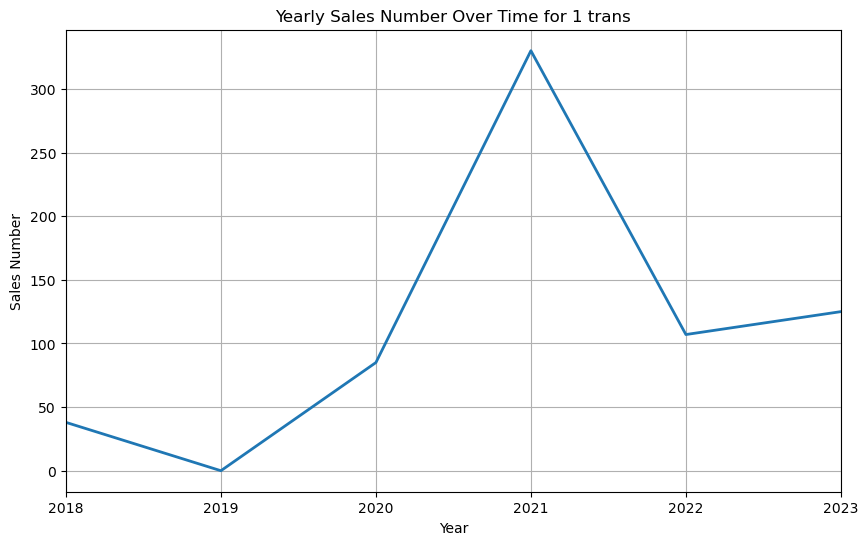

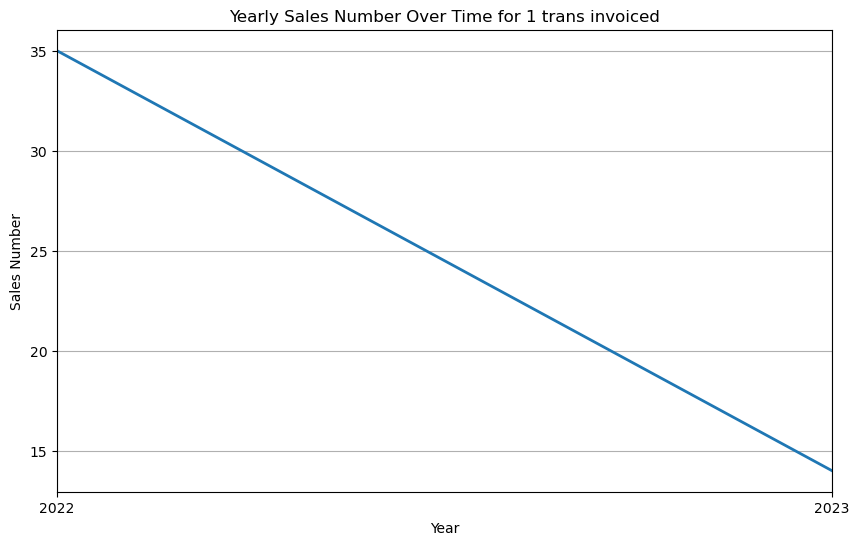

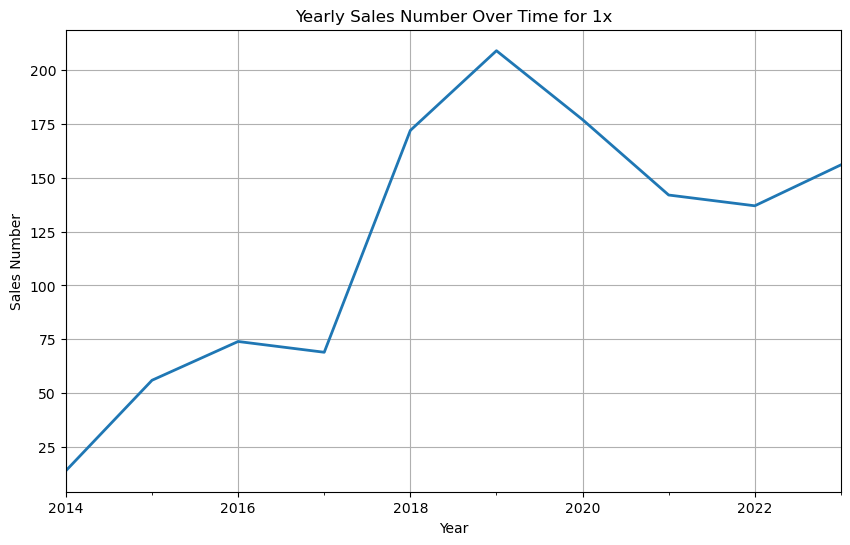

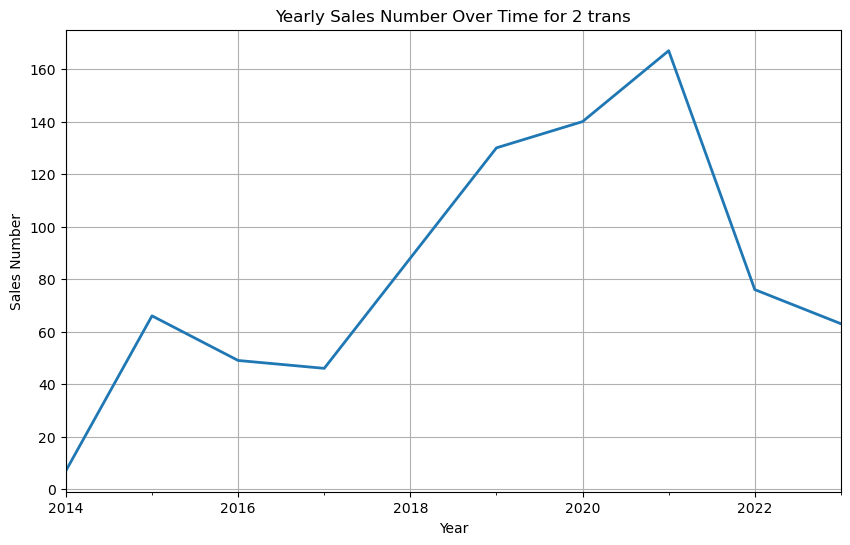

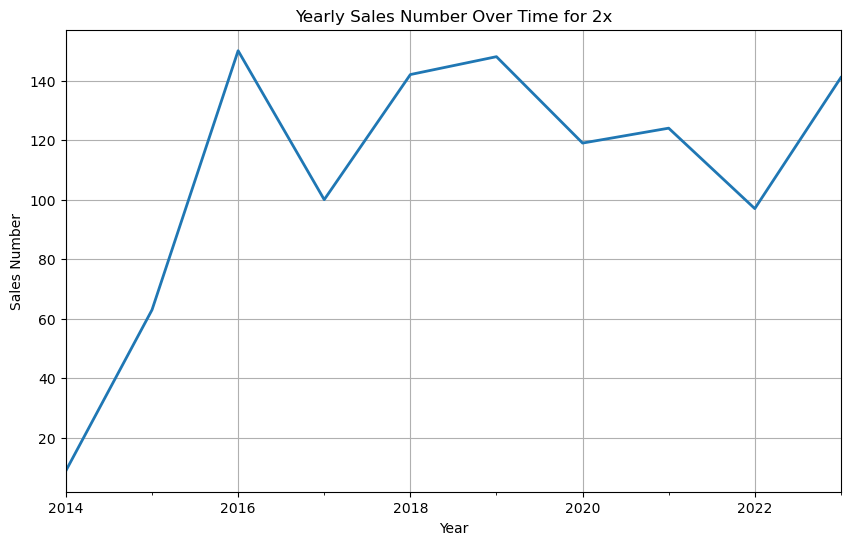

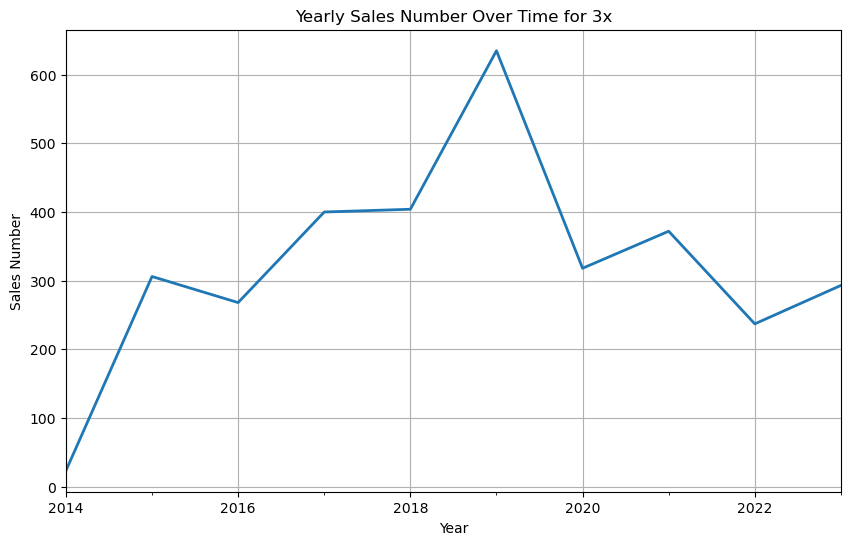

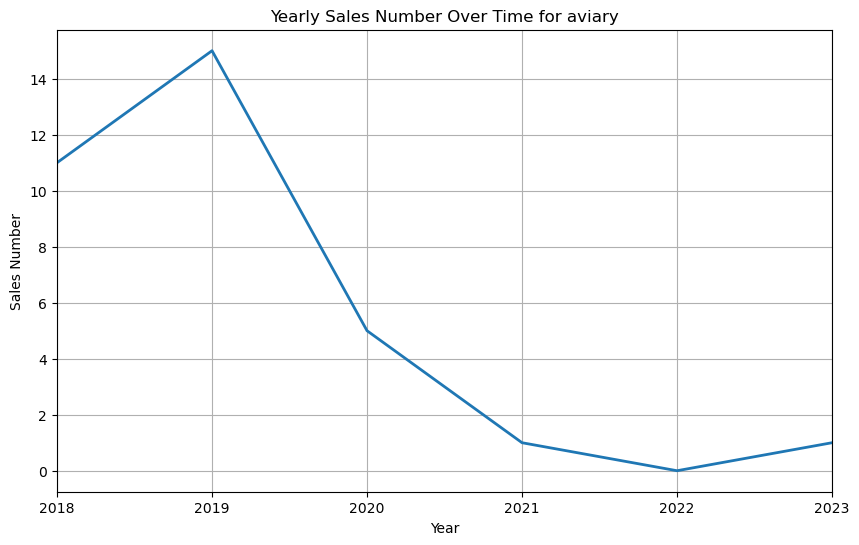

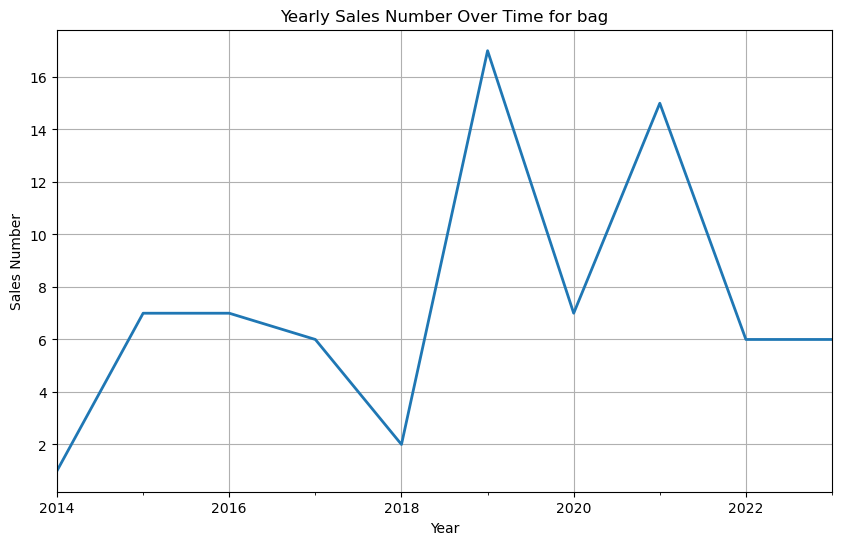

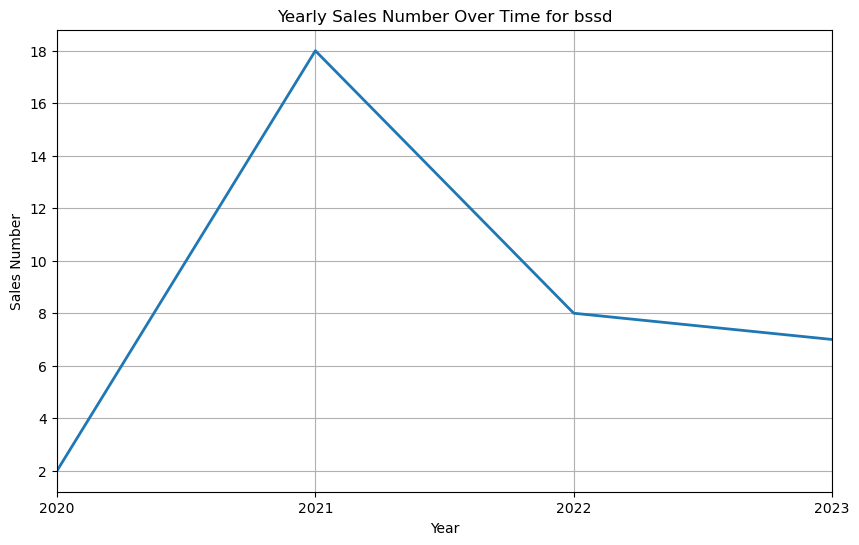

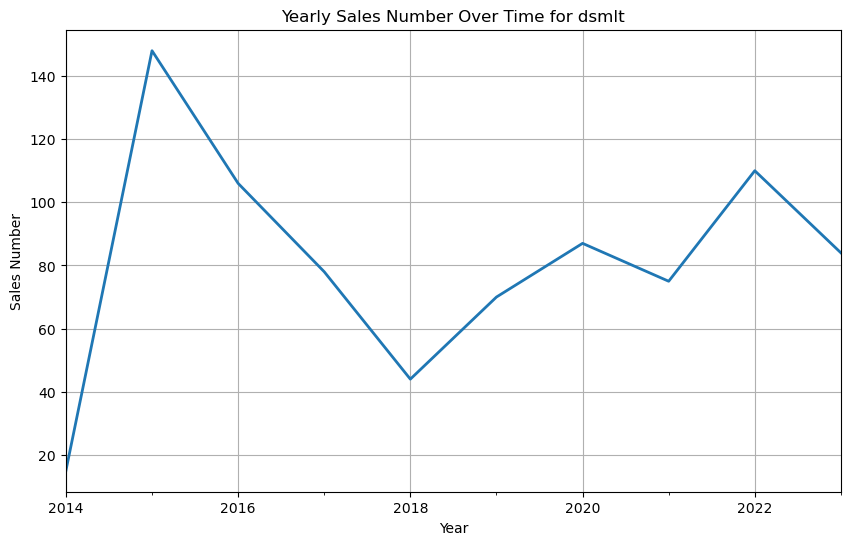

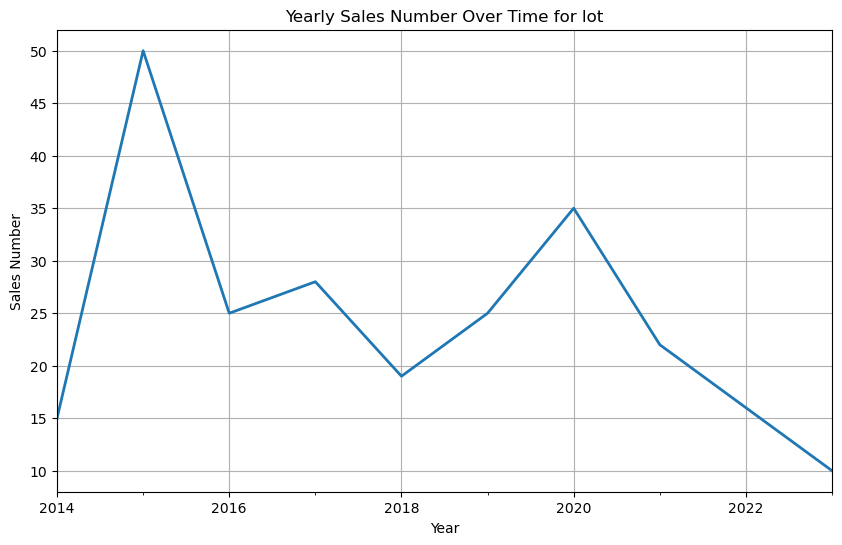

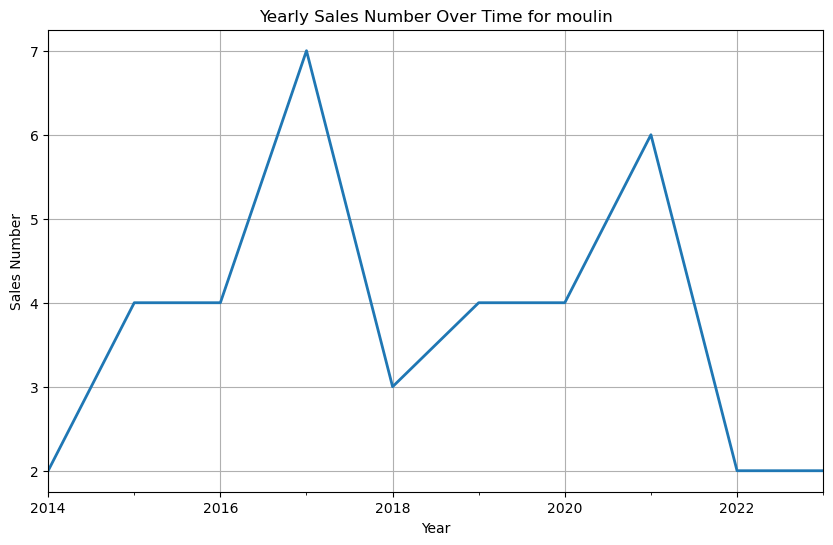

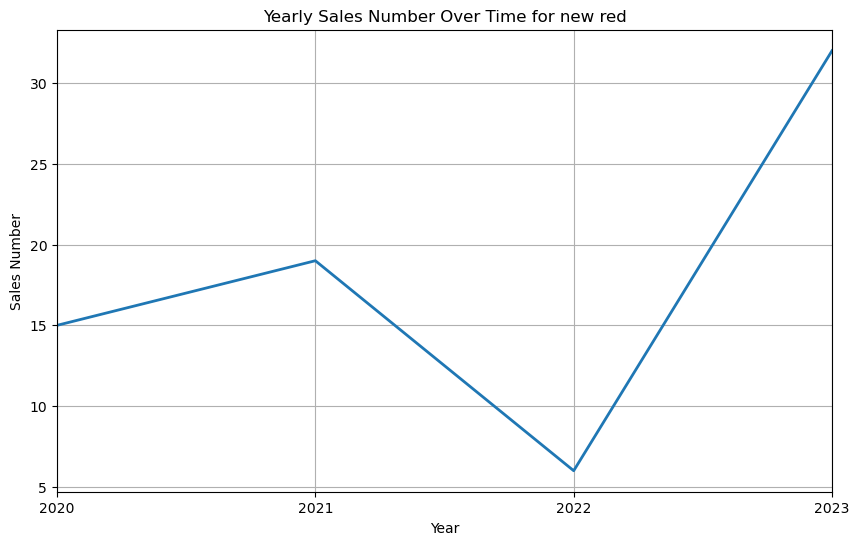

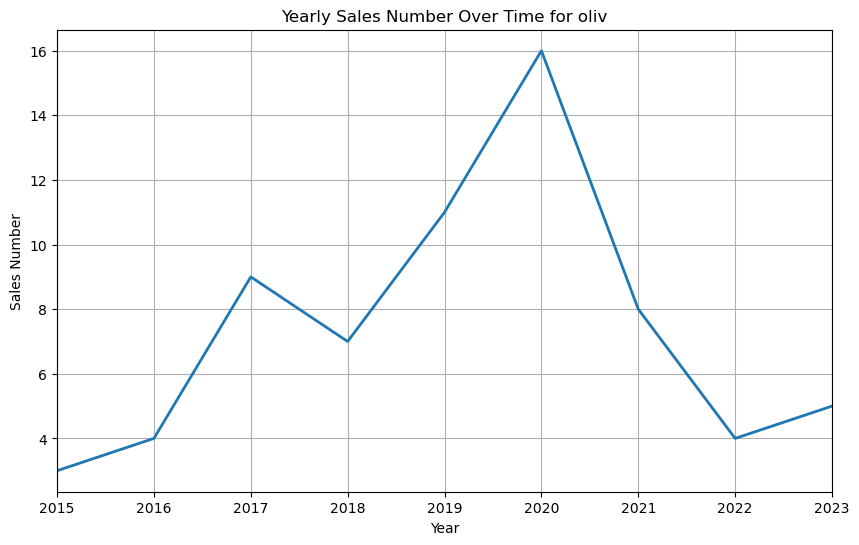

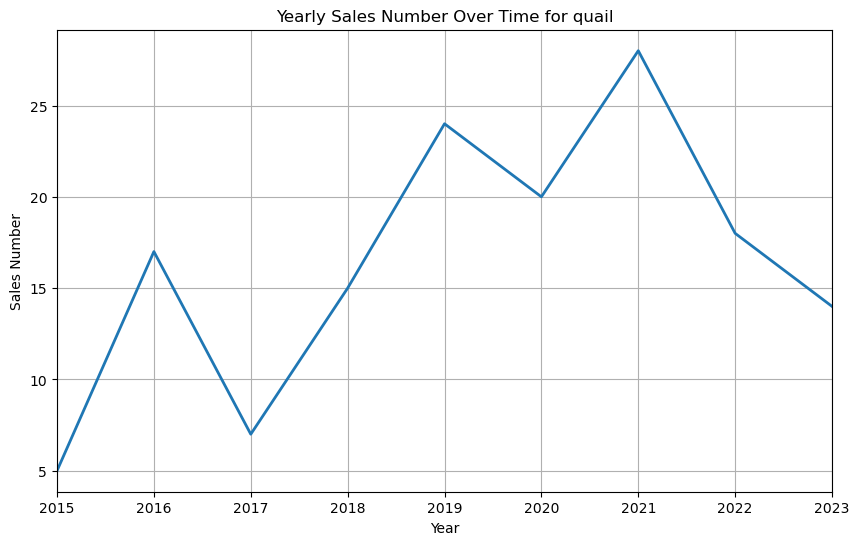

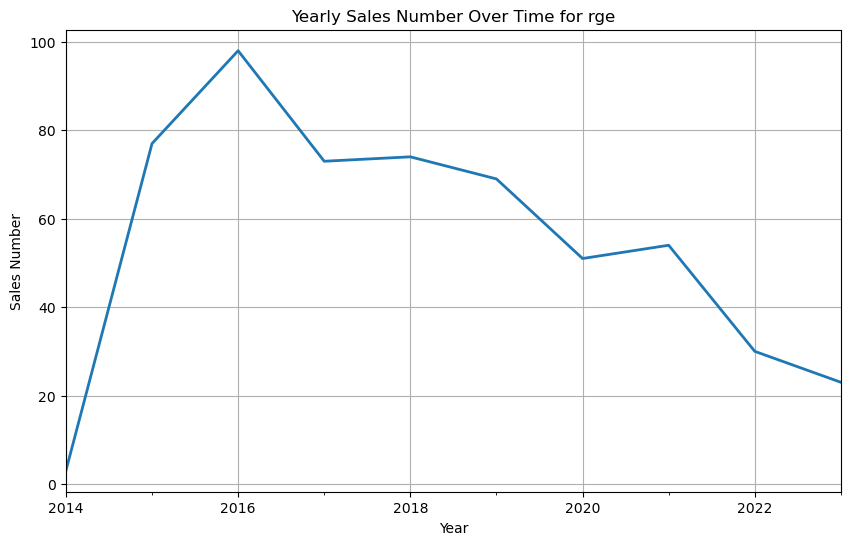

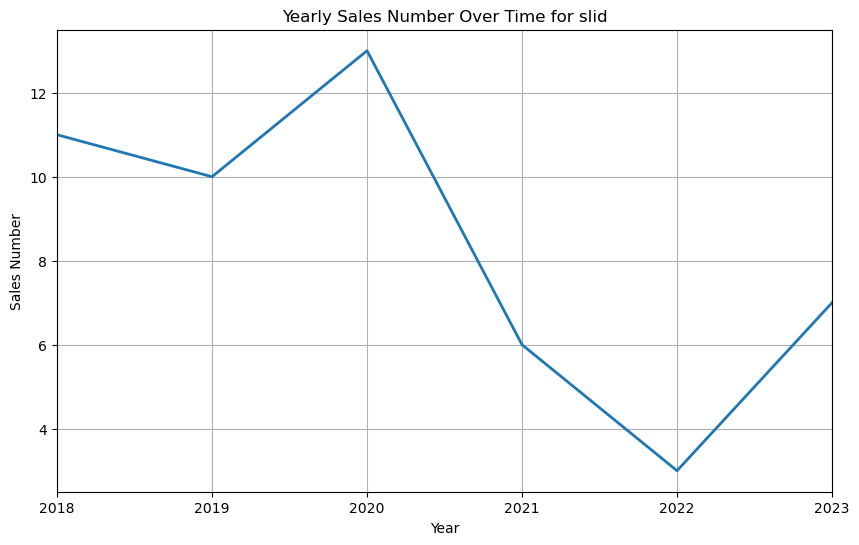

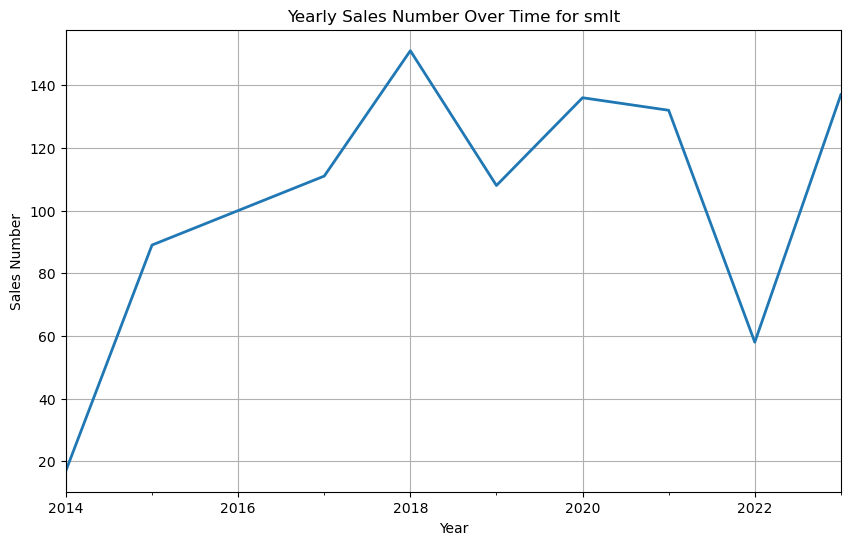

In [32]:
# per year 

# Loop through each product's dataframe and perform EDA
for product, group in grouped:    
    # Aggregate sales numbers by year
    yearly_sales = group['sales_number'].resample('Y').sum()
    
    # Plot the yearly aggregated Time Series Data
    plt.figure(figsize=(10, 6))
    yearly_sales.plot(title=f'Yearly Sales Number Over Time for {product}', lw=2)
    plt.xlabel('Year')
    plt.ylabel('Sales Number')
    plt.grid(True)
    plt.show()


In [33]:
'''
for product, group in grouped:

    # 3. Time Series Decomposition (Trend, Seasonality, Residuals)
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(group['sales_number'], model='additive', period=7)  # Adjust period as needed
    decomposition.plot()
    plt.figure(figsize=(10, 6))
    plt.suptitle(f'Time Series Decomposition for {product}')
    plt.show()
'''

"\nfor product, group in grouped:\n\n    # 3. Time Series Decomposition (Trend, Seasonality, Residuals)\n    from statsmodels.tsa.seasonal import seasonal_decompose\n    decomposition = seasonal_decompose(group['sales_number'], model='additive', period=7)  # Adjust period as needed\n    decomposition.plot()\n    plt.figure(figsize=(10, 6))\n    plt.suptitle(f'Time Series Decomposition for {product}')\n    plt.show()\n"

## Statistical Tests

#### Stationarity

In [34]:
for product, group in grouped:

    # 6. Check for Stationarity (Augmented Dickey-Fuller Test)
    result = adfuller(group['sales_number'].dropna())  # ADF Test
    print(f"\nAugmented Dickey-Fuller Test for Stationarity: {product}")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("The time series is likely stationary.")
    else:
        print("The time series is likely non-stationary.")


Augmented Dickey-Fuller Test for Stationarity: 1 trans
ADF Statistic: -19.100077440198014
p-value: 0.0
The time series is likely stationary.

Augmented Dickey-Fuller Test for Stationarity: 1 trans invoiced
ADF Statistic: -4.331664244939374
p-value: 0.0003913501501320104
The time series is likely stationary.

Augmented Dickey-Fuller Test for Stationarity: 1x
ADF Statistic: -5.490457017865744
p-value: 2.1812139325537458e-06
The time series is likely stationary.

Augmented Dickey-Fuller Test for Stationarity: 2 trans
ADF Statistic: -8.345650776949427
p-value: 3.090692833567118e-13
The time series is likely stationary.

Augmented Dickey-Fuller Test for Stationarity: 2x
ADF Statistic: -27.679864597822494
p-value: 0.0
The time series is likely stationary.

Augmented Dickey-Fuller Test for Stationarity: 3x
ADF Statistic: -8.499831808621519
p-value: 1.246972670013794e-13
The time series is likely stationary.

Augmented Dickey-Fuller Test for Stationarity: aviary
ADF Statistic: -5.567764362830

In [35]:
for product, group in grouped:
    result_kpss = kpss(group['sales_number'].dropna(), regression='c')  # KPSS Test (c for constant)
    print(f"KPSS Test for Stationarity: {product}")
    print(f"KPSS Statistic: {result_kpss[0]}")
    print(f"p-value: {result_kpss[1]}")
    if result_kpss[1] > 0.05:
        print("The time series is likely non-stationary.")
    else:
        print("The time series is likely stationary.")

KPSS Test for Stationarity: 1 trans
KPSS Statistic: 0.7804779752467795
p-value: 0.01
The time series is likely stationary.
KPSS Test for Stationarity: 1 trans invoiced
KPSS Statistic: 0.07837226827430302
p-value: 0.1
The time series is likely non-stationary.
KPSS Test for Stationarity: 1x
KPSS Statistic: 0.5795002749649636
p-value: 0.024499975003185126
The time series is likely stationary.
KPSS Test for Stationarity: 2 trans
KPSS Statistic: 0.7971512698742195
p-value: 0.01
The time series is likely stationary.
KPSS Test for Stationarity: 2x
KPSS Statistic: 0.8877648583464621
p-value: 0.01
The time series is likely stationary.
KPSS Test for Stationarity: 3x
KPSS Statistic: 1.7331363395805004
p-value: 0.01
The time series is likely stationary.
KPSS Test for Stationarity: aviary
KPSS Statistic: 0.2789363920750782
p-value: 0.1
The time series is likely non-stationary.
KPSS Test for Stationarity: bag
KPSS Statistic: 0.19150985481385374
p-value: 0.1
The time series is likely non-stationary.


In [36]:
#  we removed bssd product from dataset because it is non-stationary according to Dickey-Fuller test and KPSS test 
del product_dataframes['bssd']

## Modeling :

# 1. Vector Autoregression (VAR)


In [37]:
from statsmodels.tsa.api import VAR
# Loop through each unique product in 'CodeProduit'
for product_name,product in product_dataframes.items():
    # Apply VAR model to the data for this product
    try:
        train_df = product.iloc[:-10]  
        test_df = product.iloc[-10:]
        model = VAR(product)
        model_fitted = model.fit(maxlags=4, ic='aic')  # Adjust the maxlags as needed
    
        # Forecast for the next 10 periods
        forecast = model_fitted.forecast(product.values[-model_fitted.k_ar:], steps=10)
        forecast_dates = pd.date_range(start=product.index[-1] + pd.Timedelta(days=1), periods=10)
        forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=product.columns)
    
        mse = mean_squared_error(test_df, forecast_df)
        print(f"Mean Squared Error: {mse} for {product_name}")

    except Exception as e:
        continue

Mean Squared Error: 0.0035455890562969745 for 2 trans
Mean Squared Error: 0.003625817529709791 for 2x
Mean Squared Error: 0.019575652556112356 for aviary
Mean Squared Error: 0.03265842779915757 for moulin
Mean Squared Error: 0.010363625870505986 for quail
Mean Squared Error: 0.003169684713553465 for rge


Mean Squared Error: 0.0006306853681813795


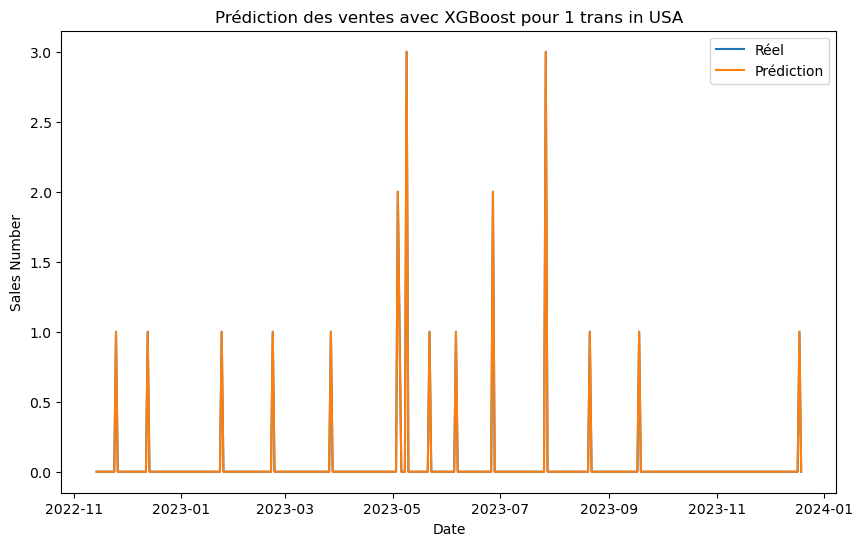

Mean Squared Error: 0.0011921951880078927


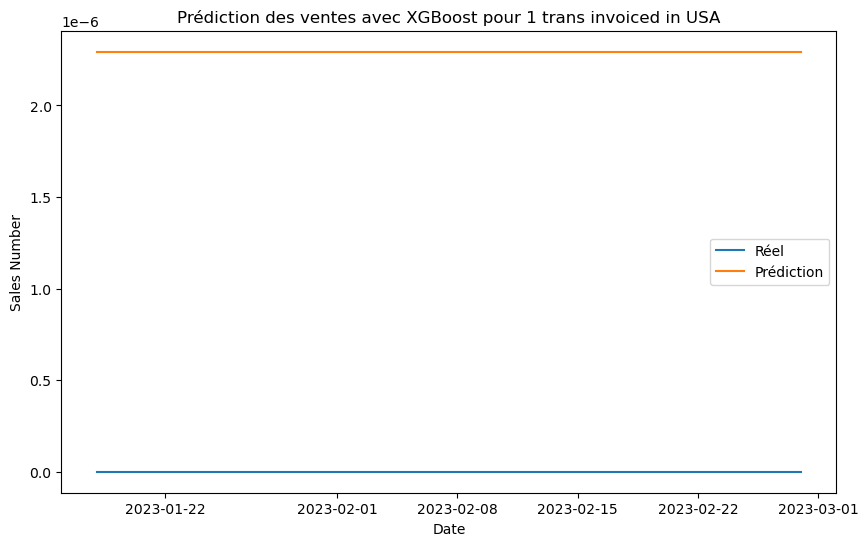

Mean Squared Error: 0.0007061830283405034


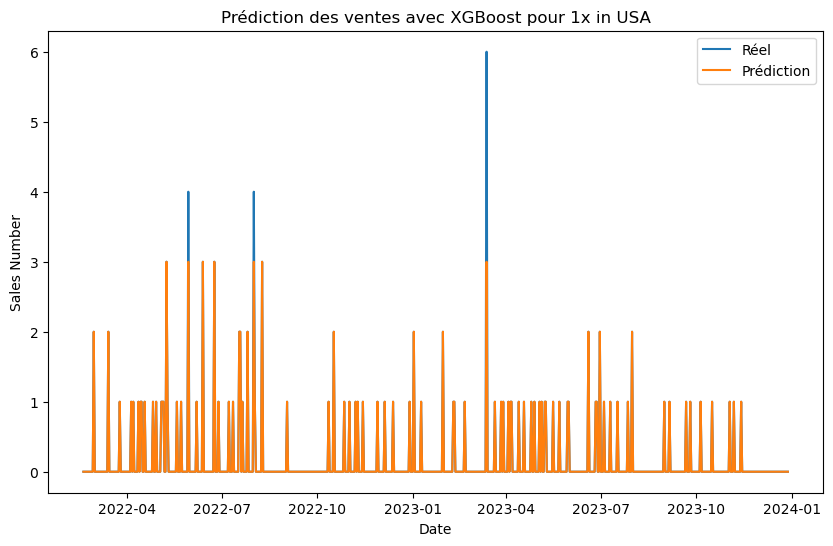

Mean Squared Error: 0.0001095871542794066


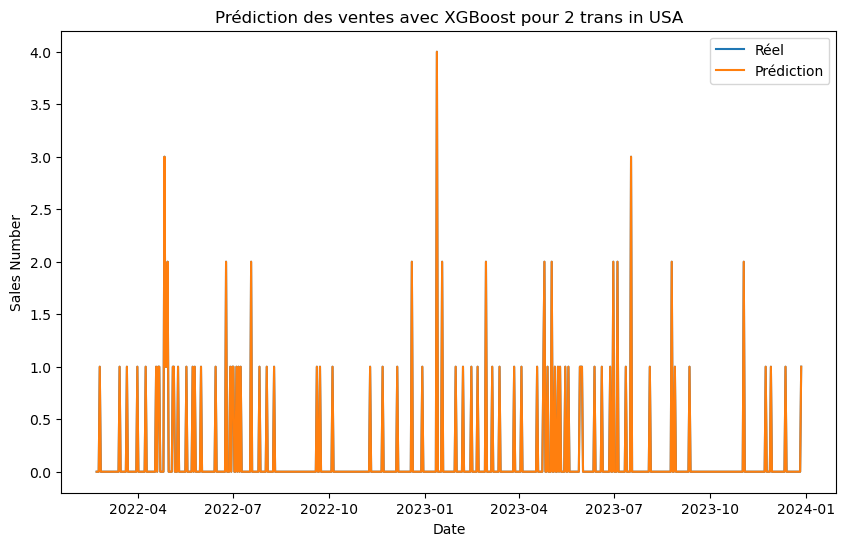

Mean Squared Error: 0.00043800269910256625


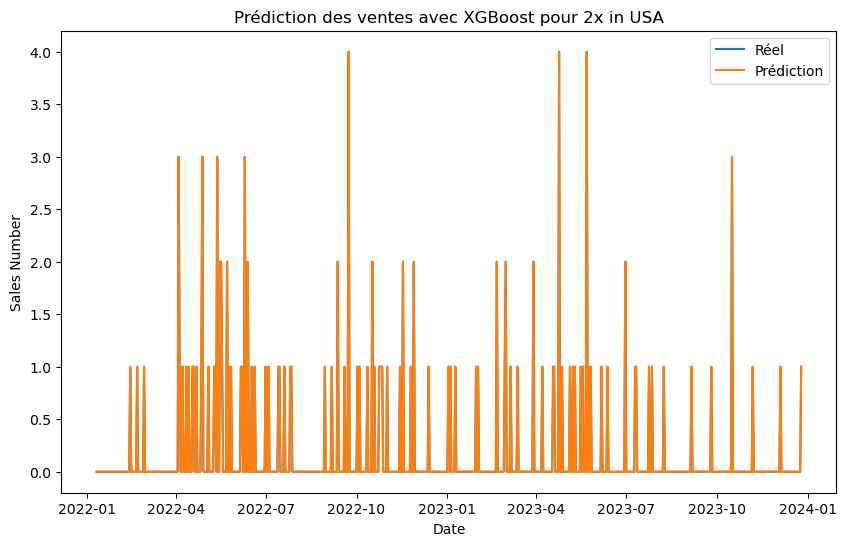

Mean Squared Error: 7.78243387505736e-06


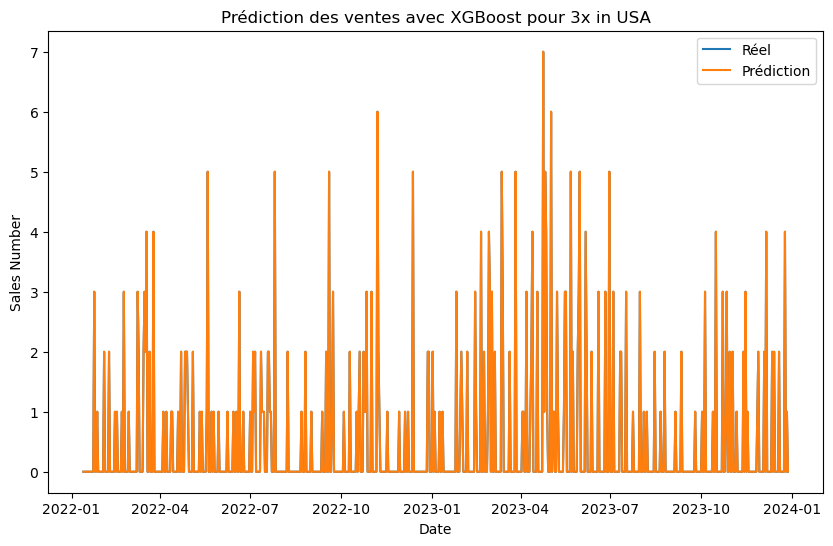

Mean Squared Error: 6.835841861180976e-12


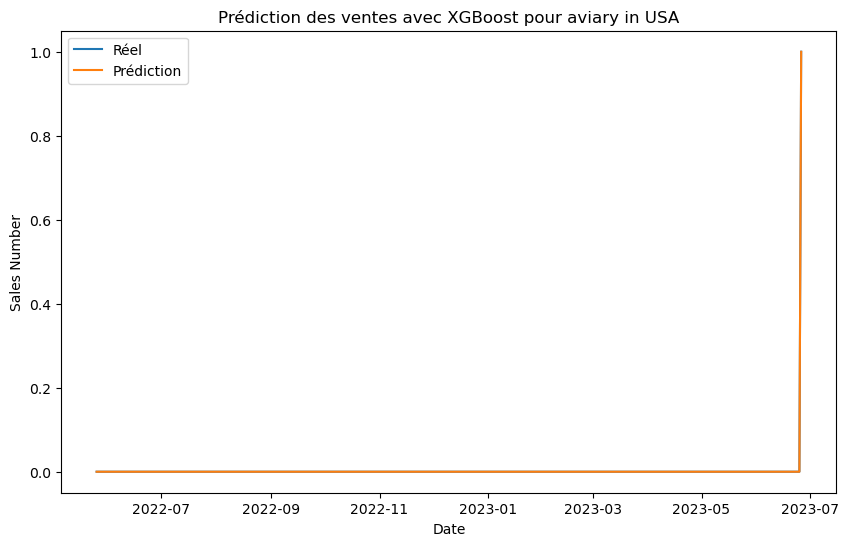

Mean Squared Error: 0.00014925403381375345


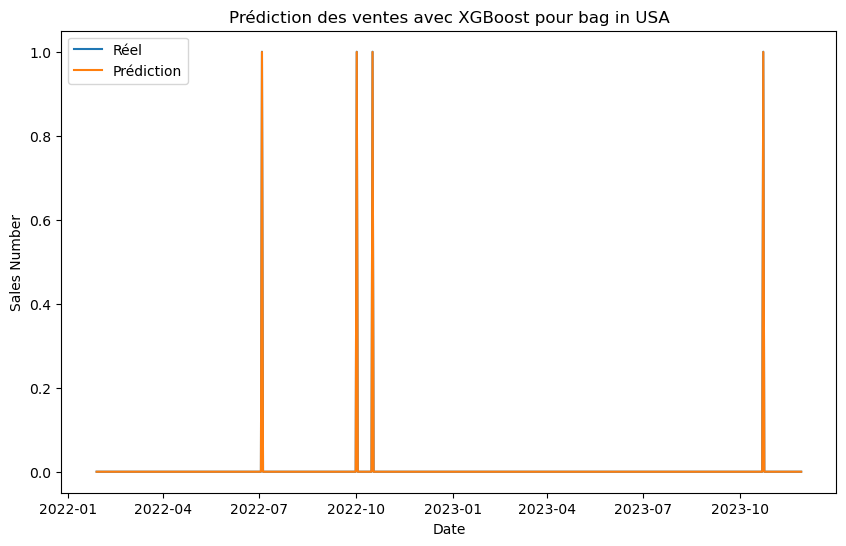

Mean Squared Error: 5.641258182781235e-05


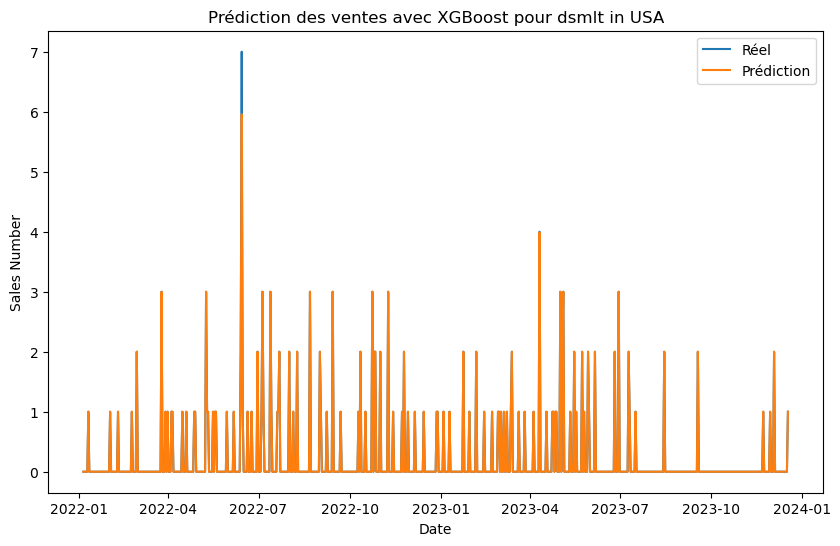

Mean Squared Error: 7.10258897337147e-05


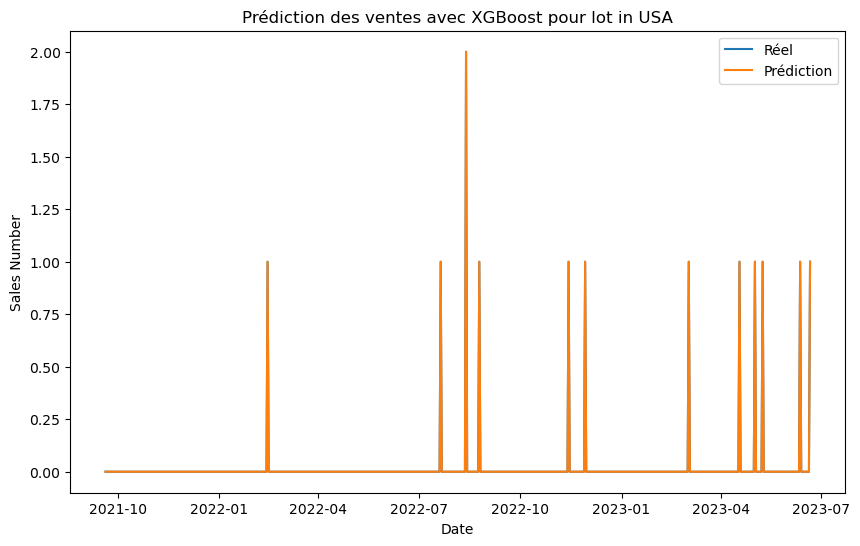

Mean Squared Error: 8.15948301609393e-11


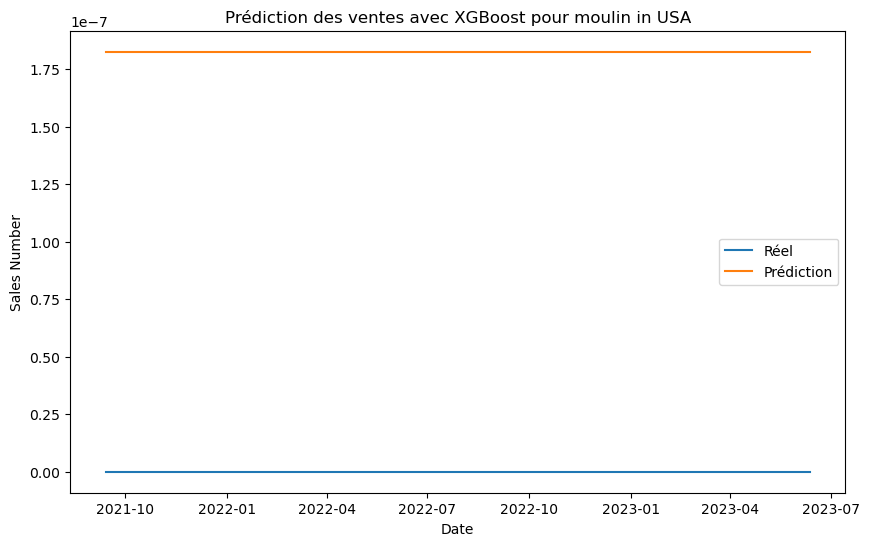

Mean Squared Error: 0.0019339949192661455


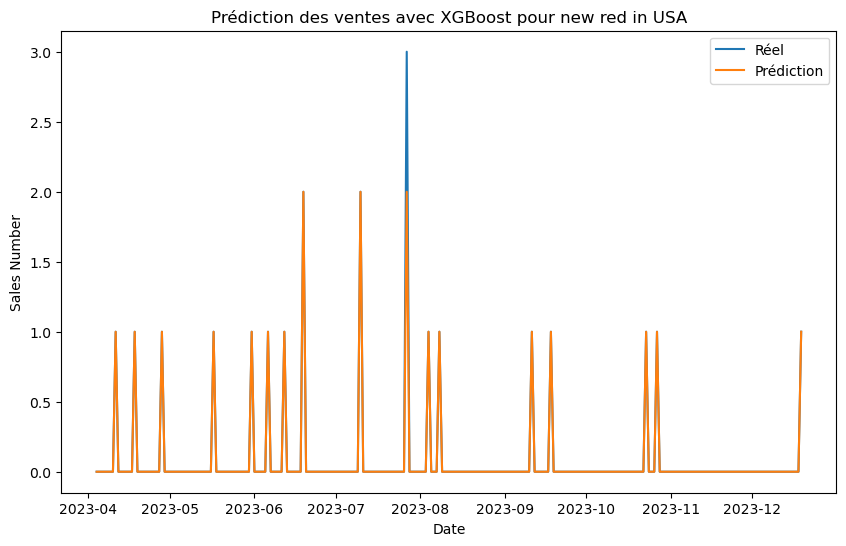

Mean Squared Error: 1.7137764337315693e-08


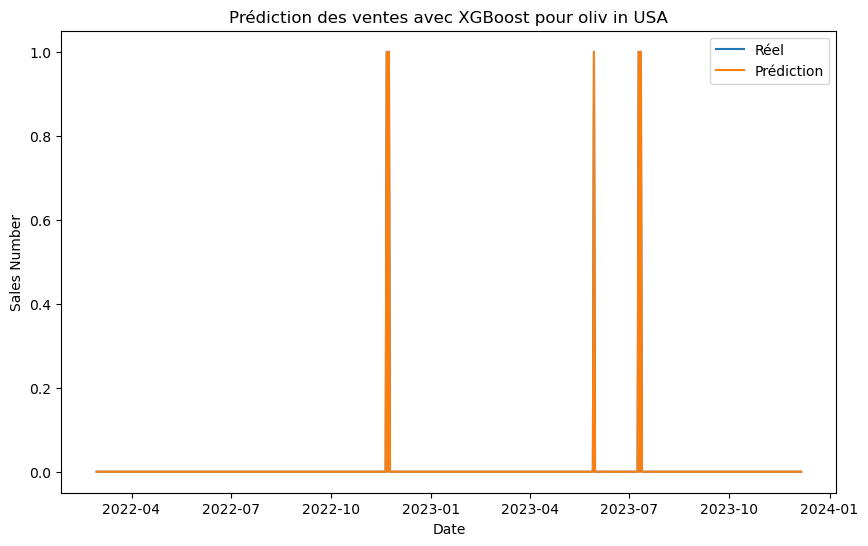

Mean Squared Error: 1.4207491883868014e-10


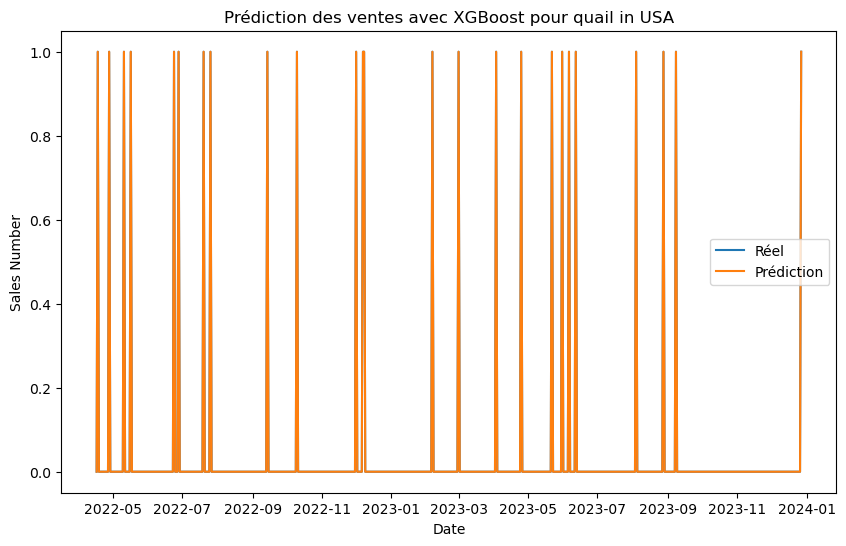

Mean Squared Error: 5.101012901497959e-05


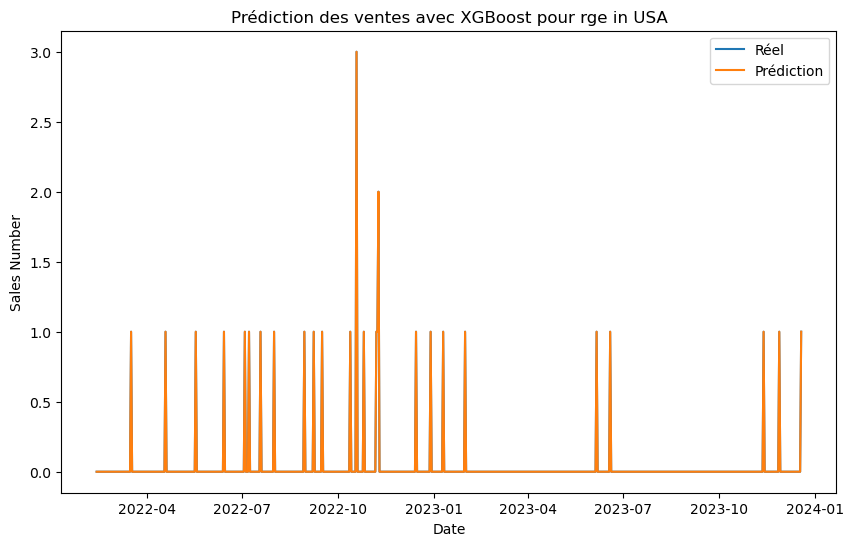

Mean Squared Error: 0.000349675351140774


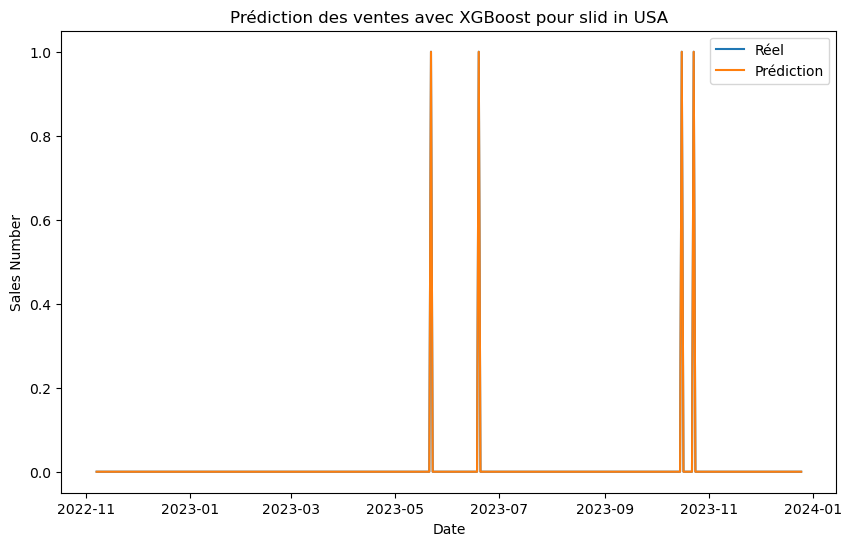

Mean Squared Error: 7.58192021132825e-05


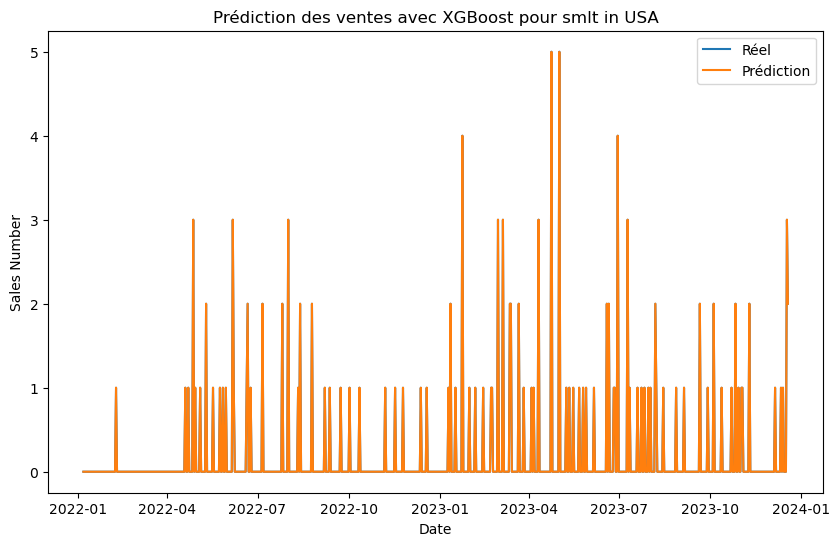

In [38]:
! pip install xgboost
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Exemple de préparation des données avec des lags
def create_lags(df, lags=3):
    df_lags = df.copy()
    for col in df.columns:
        for i in range(1, lags+1):
            df_lags[f'{col}_lag_{i}'] = df_lags[col].shift(i)
    
    df_lags = df_lags.dropna()  # Drop rows with NaN values due to lagging
    return df_lags
    
for product_name,product in product_dataframes.items():
    # Préparer les données
    df_lags = create_lags(product, lags=3)
    
    # Diviser en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(df_lags, df_lags, test_size=0.2, shuffle=False)
    
    # Créer un modèle XGBoost
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01)
    
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Évaluation du modèle
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    
    # Tracer les prédictions par rapport aux valeurs réelles
    plt.figure(figsize=(10,6))
    
    plt.plot(y_test.iloc[:, 0].index,y_test.iloc[:, 0], label='Réel')
    plt.plot(y_test.iloc[:, 0].index, y_pred[:, 0], label='Prédiction')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Sales Number')
    plt.title(f'Prédiction des ventes avec XGBoost pour {product_name} in USA')
    plt.show()
